In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
# edu se la come

sns.set_theme(font='Victor Mono',style='whitegrid',palette='Pastel2')


In [22]:
df_hoteles = gpd.read_file('data\geodata_historicos\df_hoteles.shp')
df_cuartos = gpd.read_file('data\geodata_historicos\df_cuartos.shp')
df_servicios = gpd.read_file('data\geodata_historicos\df_servicios.shp')



<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\fofoy\AppData\Local\Temp\ipykernel_19908\503590883.py:1: SyntaxWarning: invalid escape sequence '\g'
  df_hoteles = gpd.read_file('data\geodata_historicos\df_hoteles.shp')
C:\Users\fofoy\AppData\Local\Temp\ipykernel_19908\503590883.py:2: SyntaxWarning: invalid escape sequence '\g'
  df_cuartos = gpd.read_file('data\geodata_historicos\df_cuartos.shp')
C:\Users\fofoy\AppData\Local\Temp\ipykernel_19908\503590883.py:3: SyntaxWarning: invalid escape sequence '\g'
  df_servicios = gpd.read_file('data\geodata_historicos\df_servicios.shp')


In [23]:
# Cast columns
object_columns = ['municipio','region','geometry']
new_dfs = []

for df in (df_servicios,df_cuartos,df_hoteles):

    df = df.replace('N/D','0')
    df = df.replace('ND','0')

    for col in df.columns:
        if col in object_columns:
            continue
        df[col] = df[col].astype('int64')
    new_dfs.append(df)
    
(df_servicios,df_cuartos,df_hoteles) = new_dfs


# Series de tiempo


A continuacion se muestran series de tiempo del cambio de oferta de establecimientos y cuartos separados por region

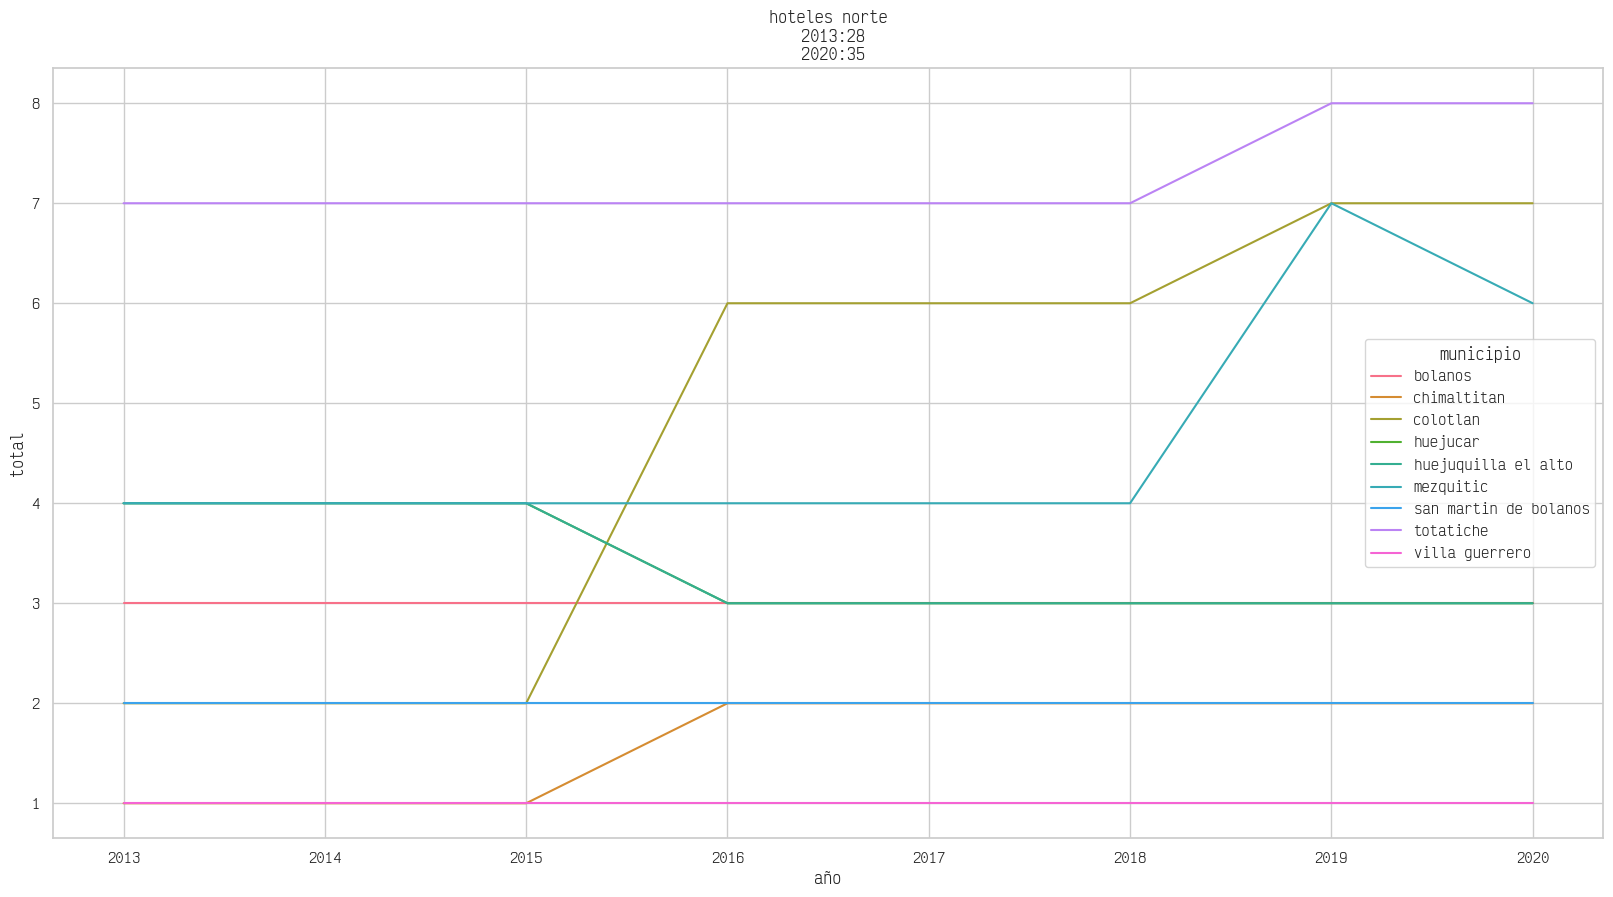

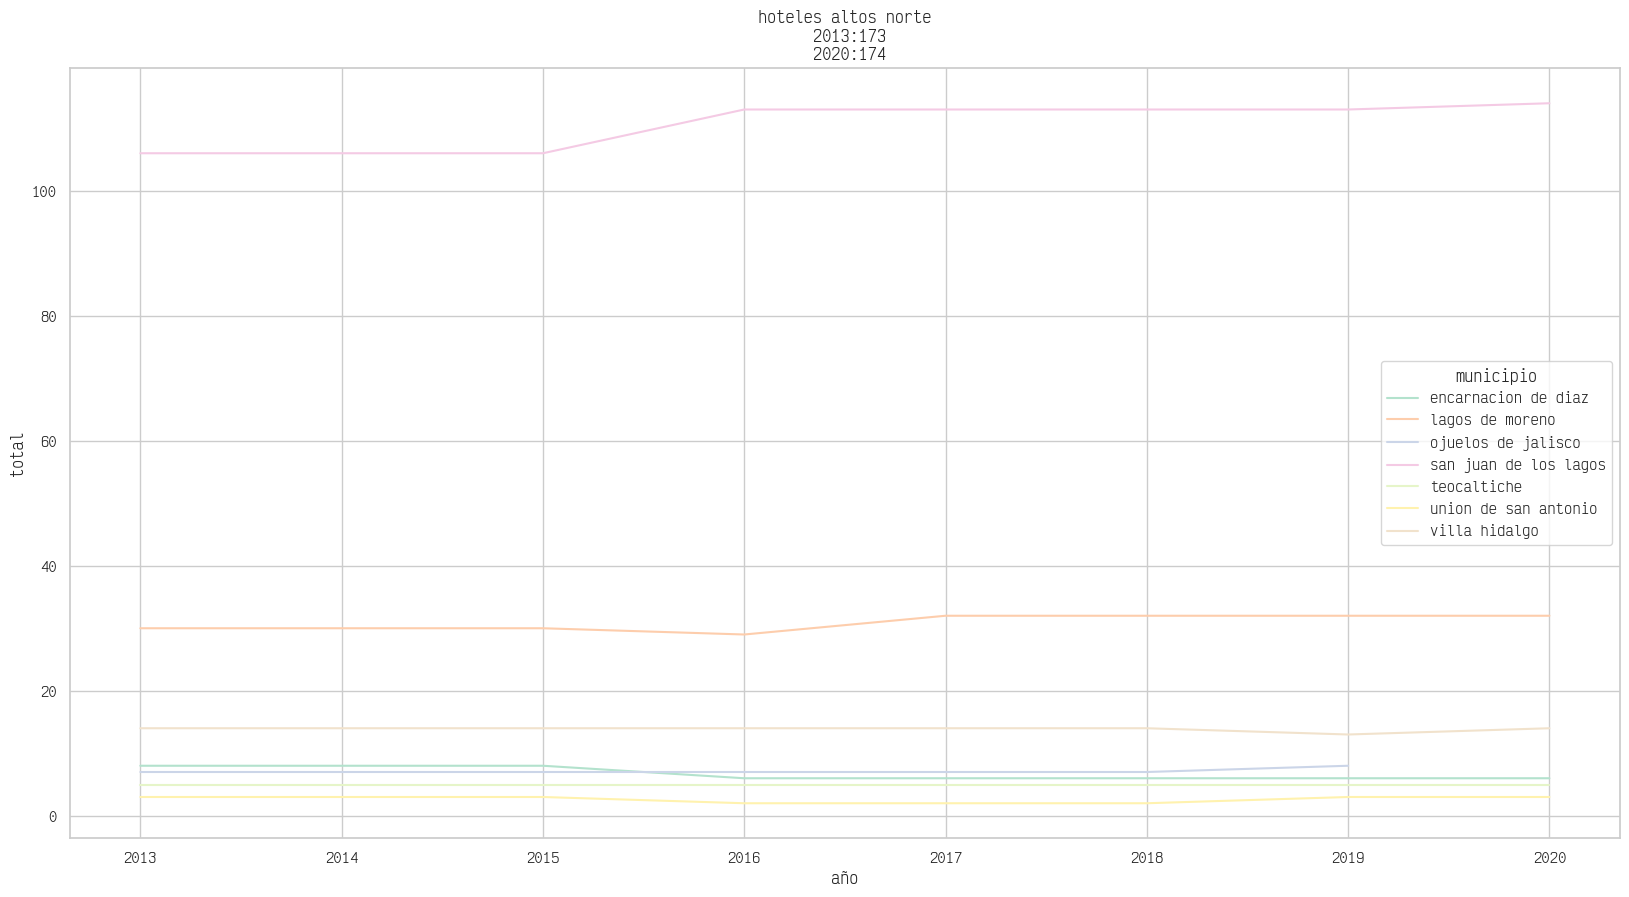

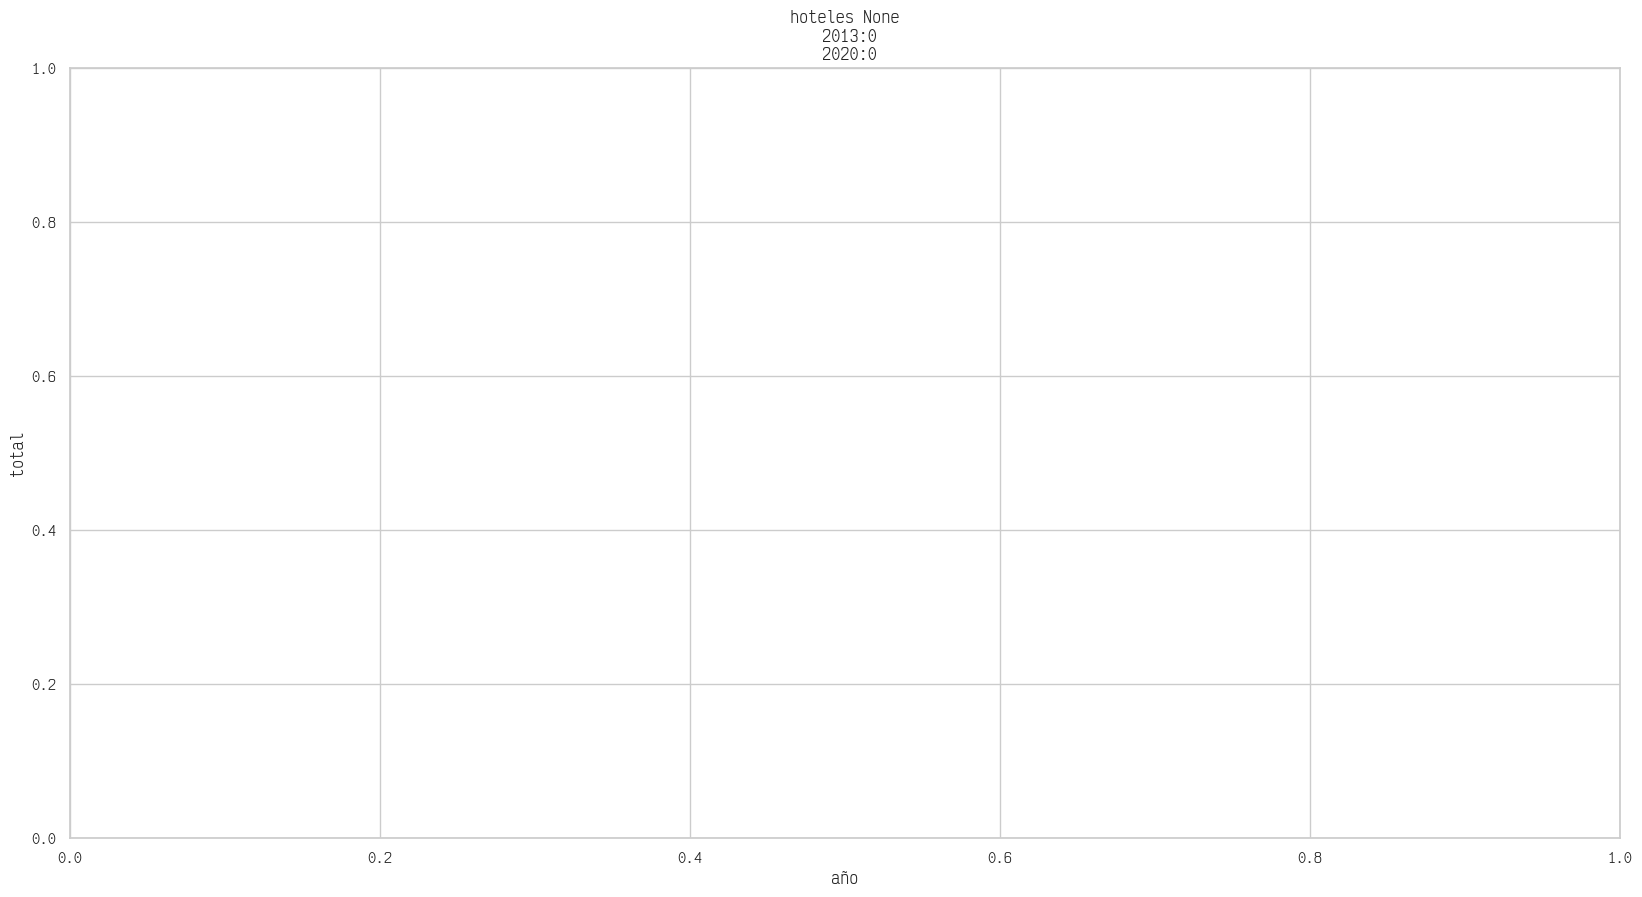

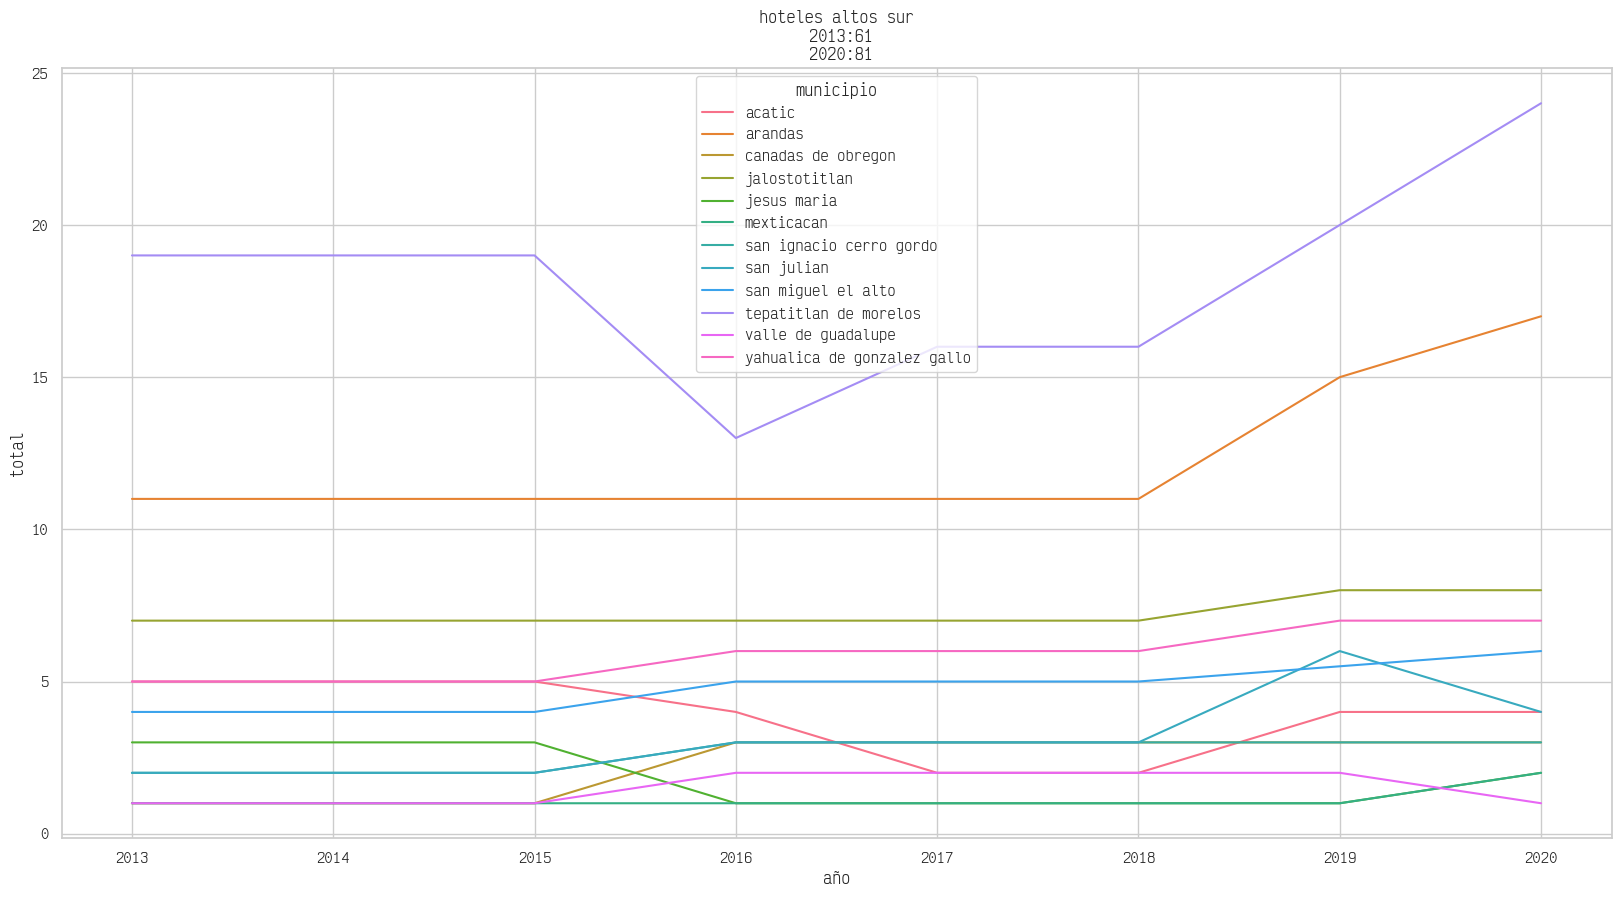

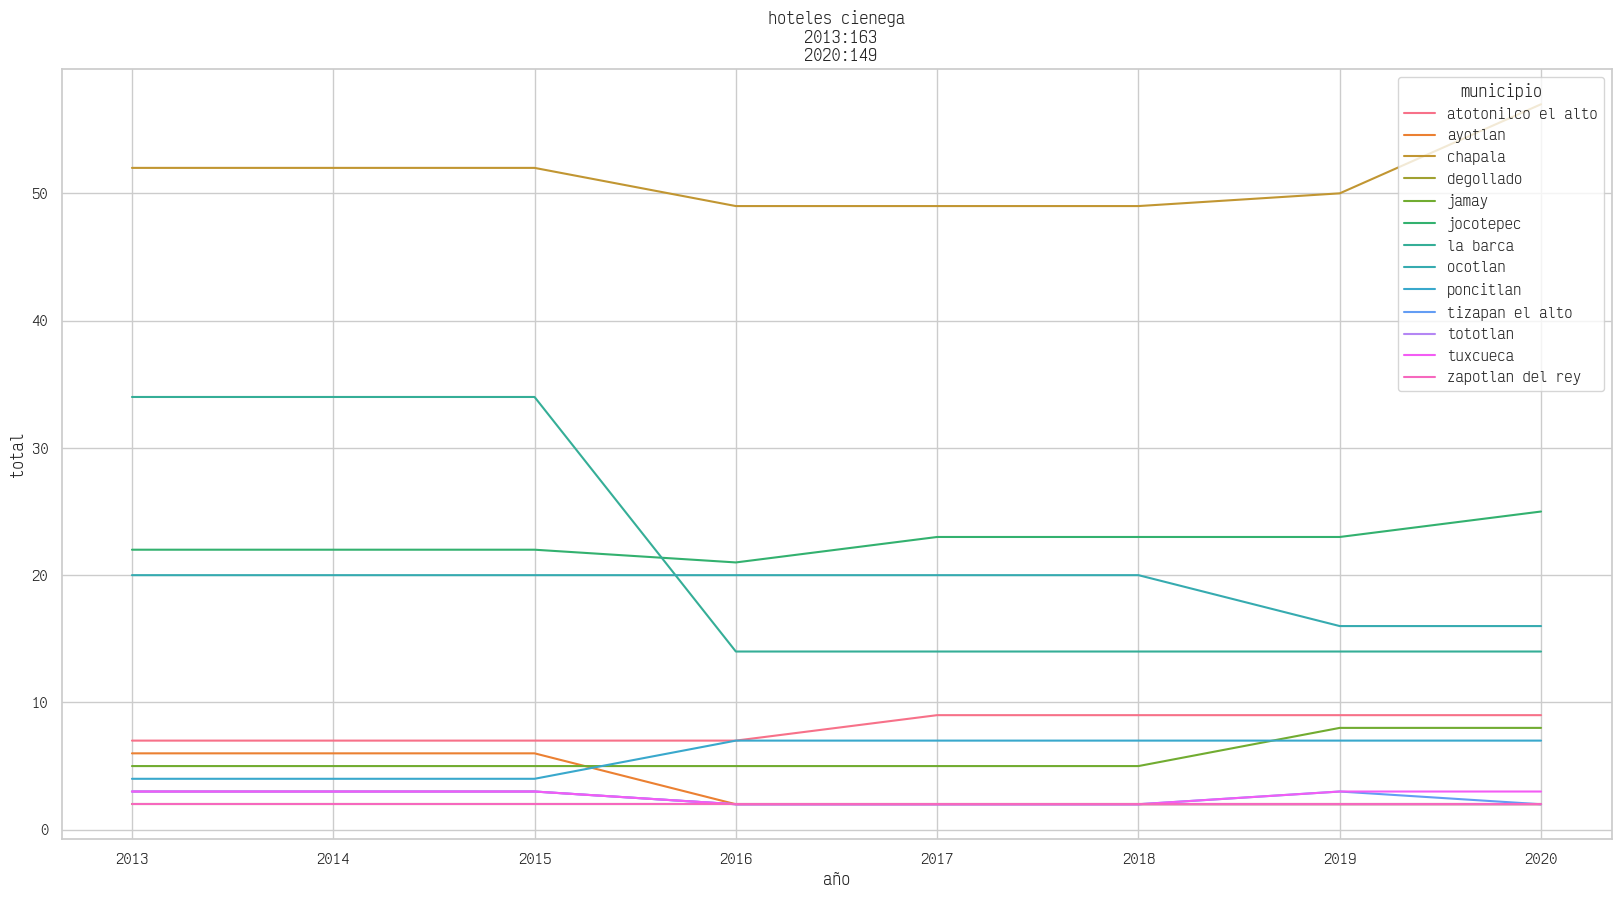

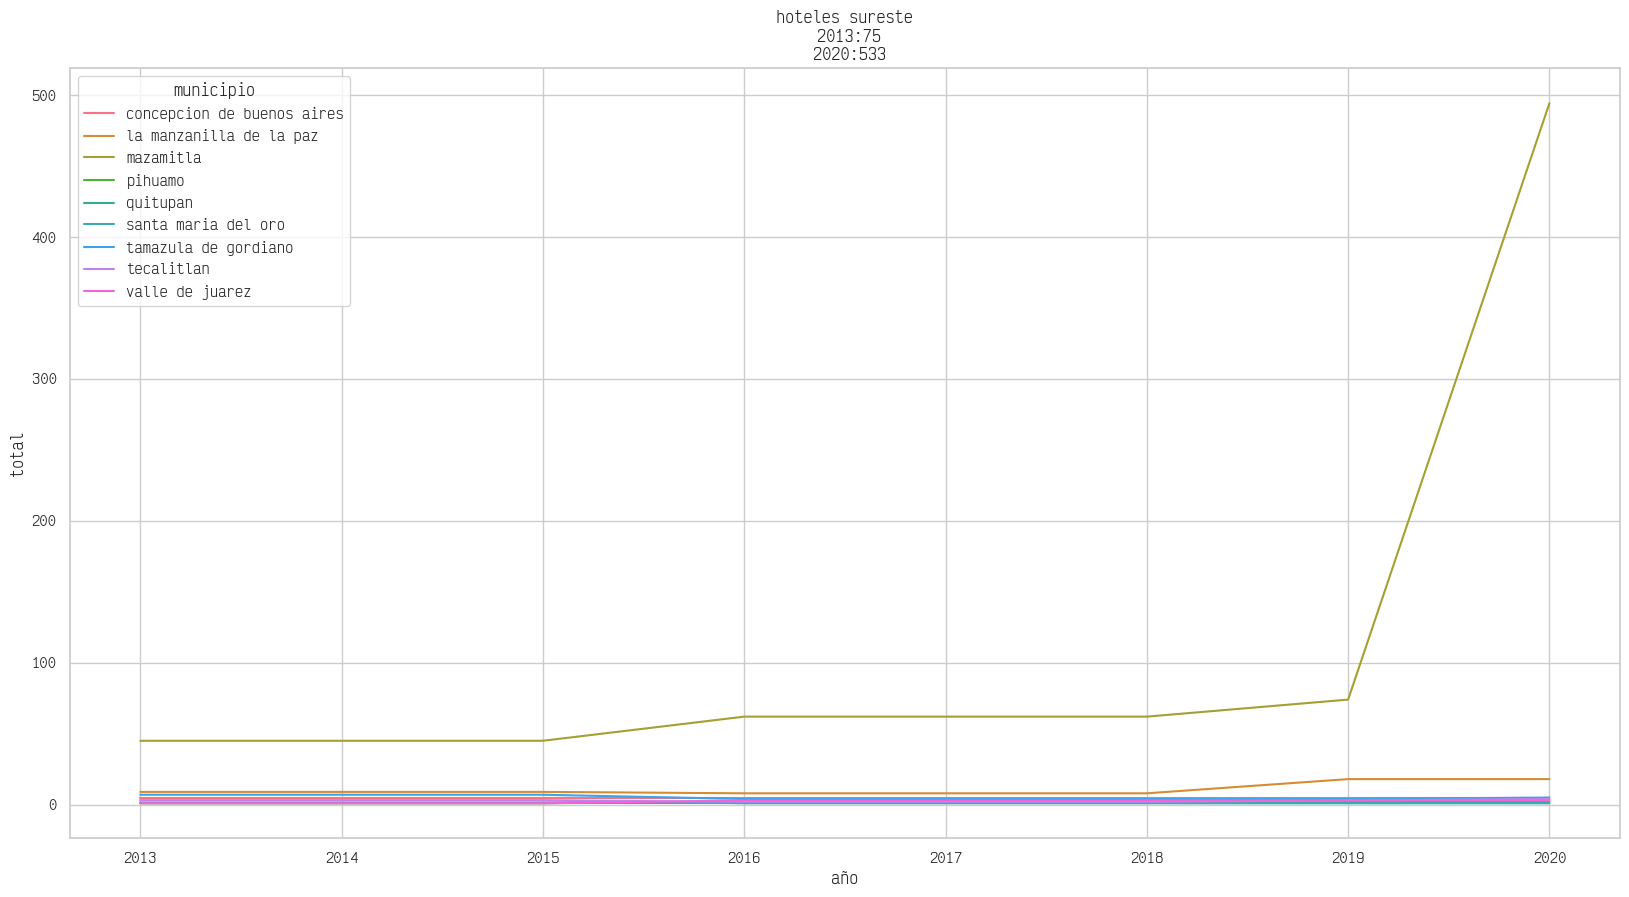

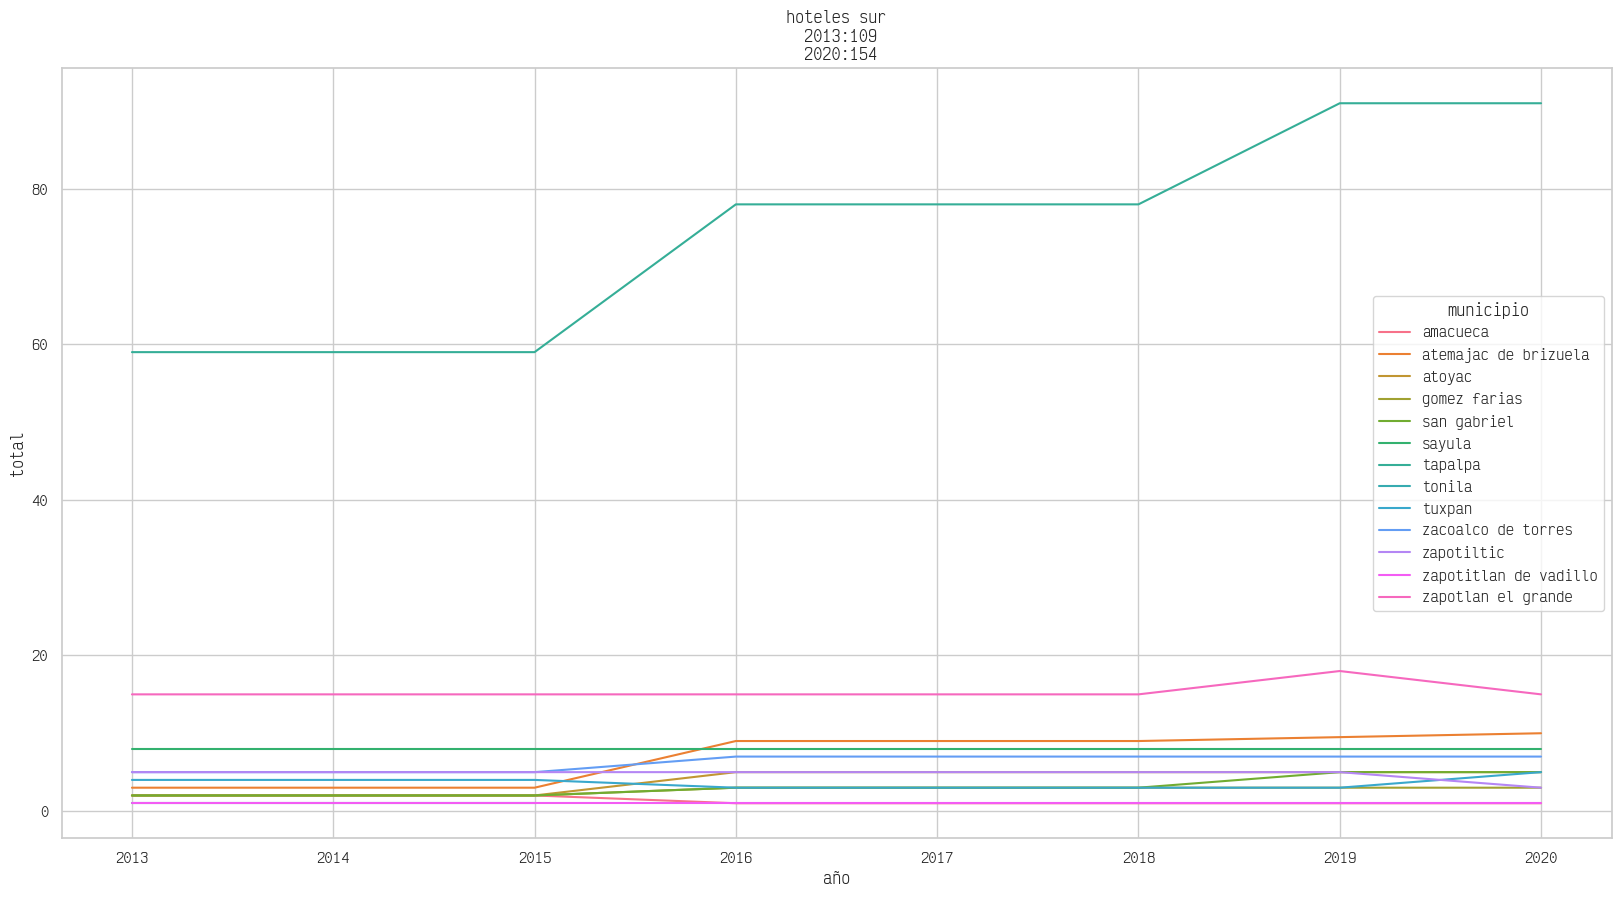

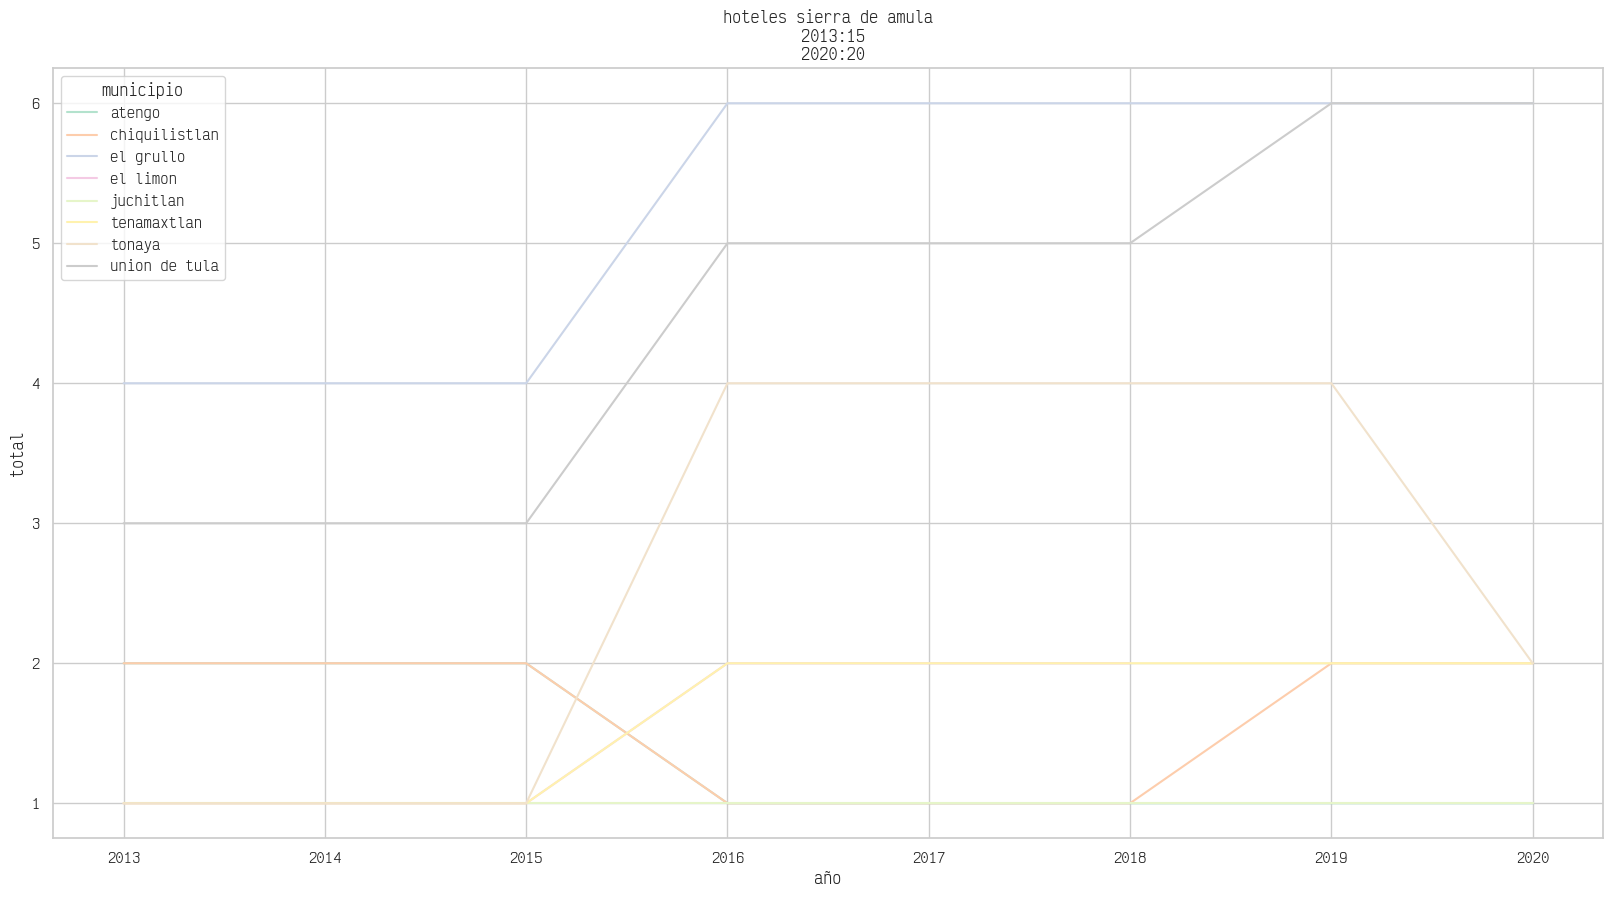

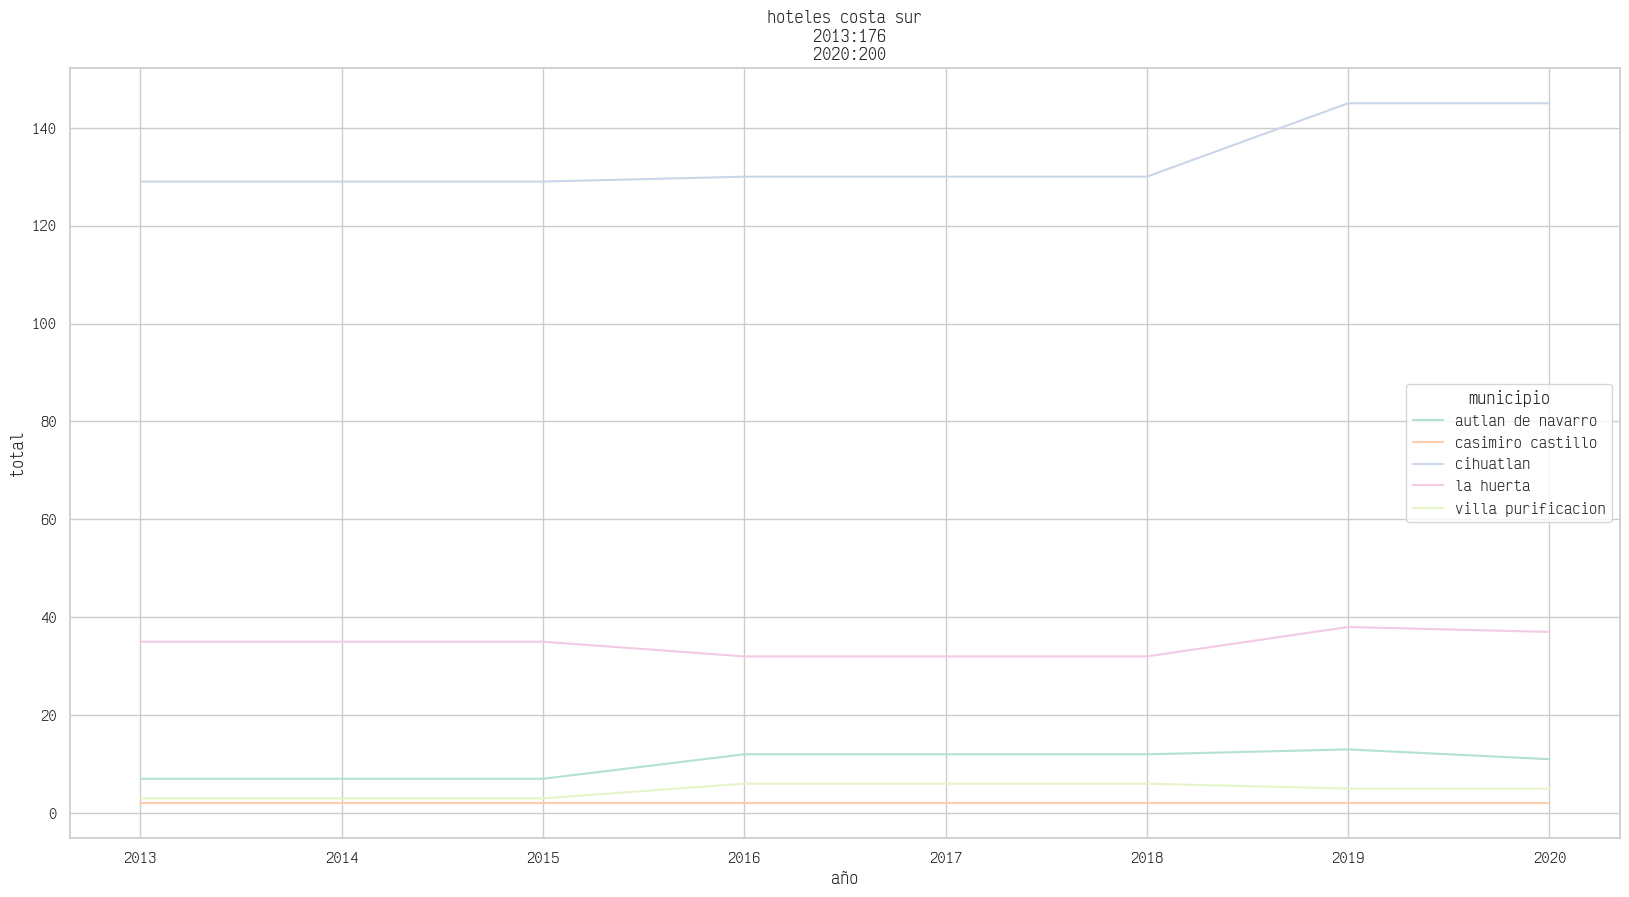

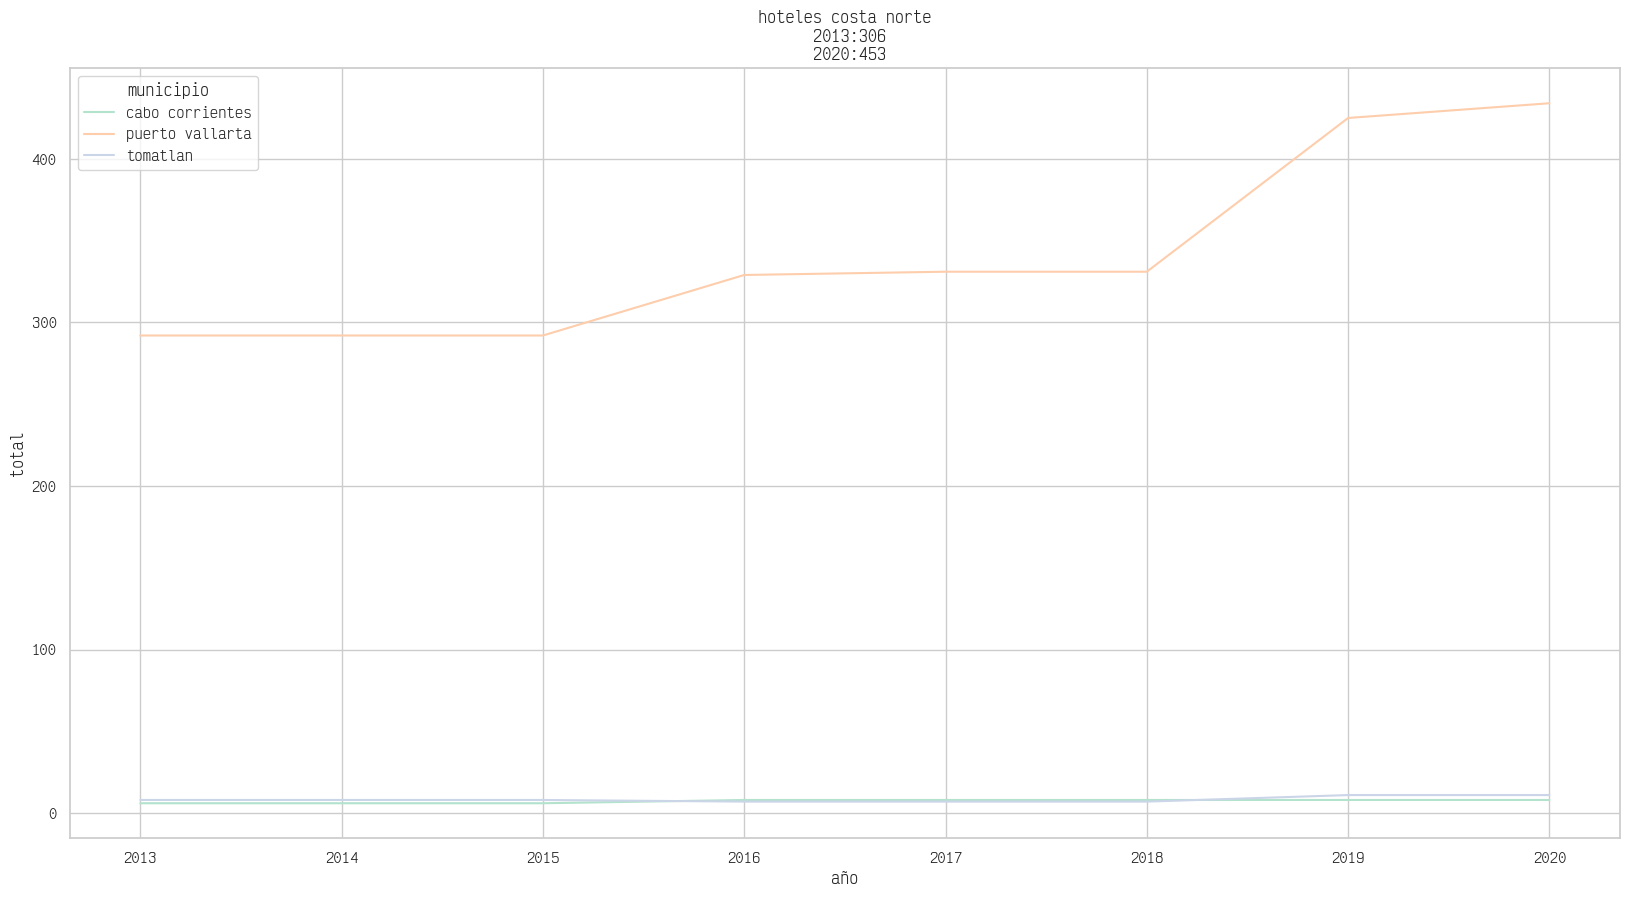

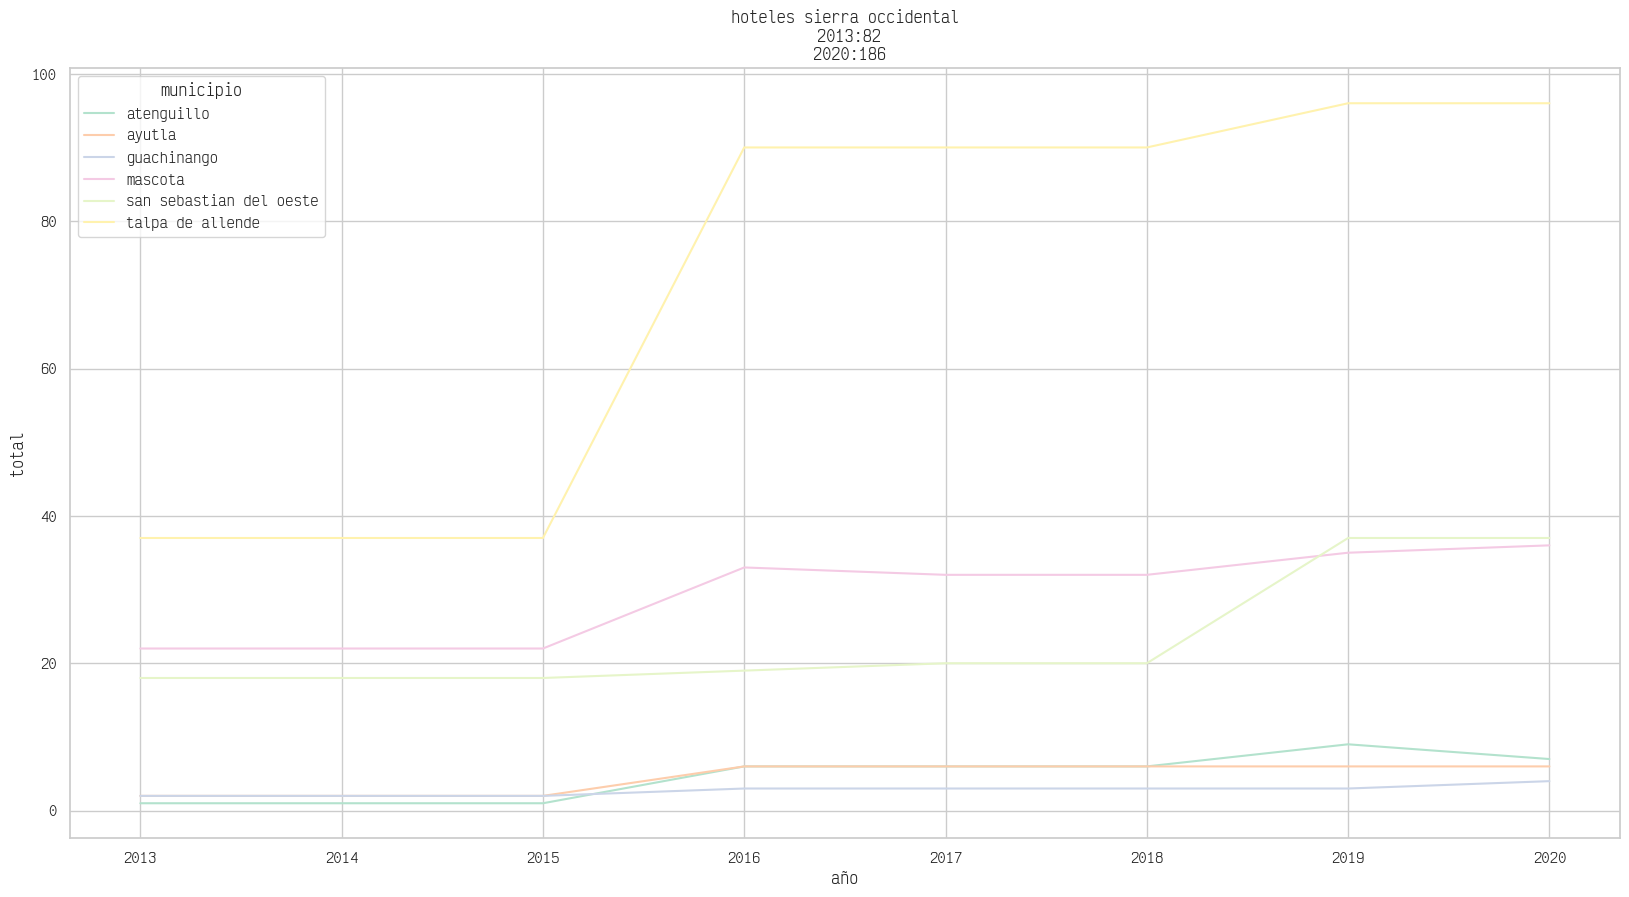

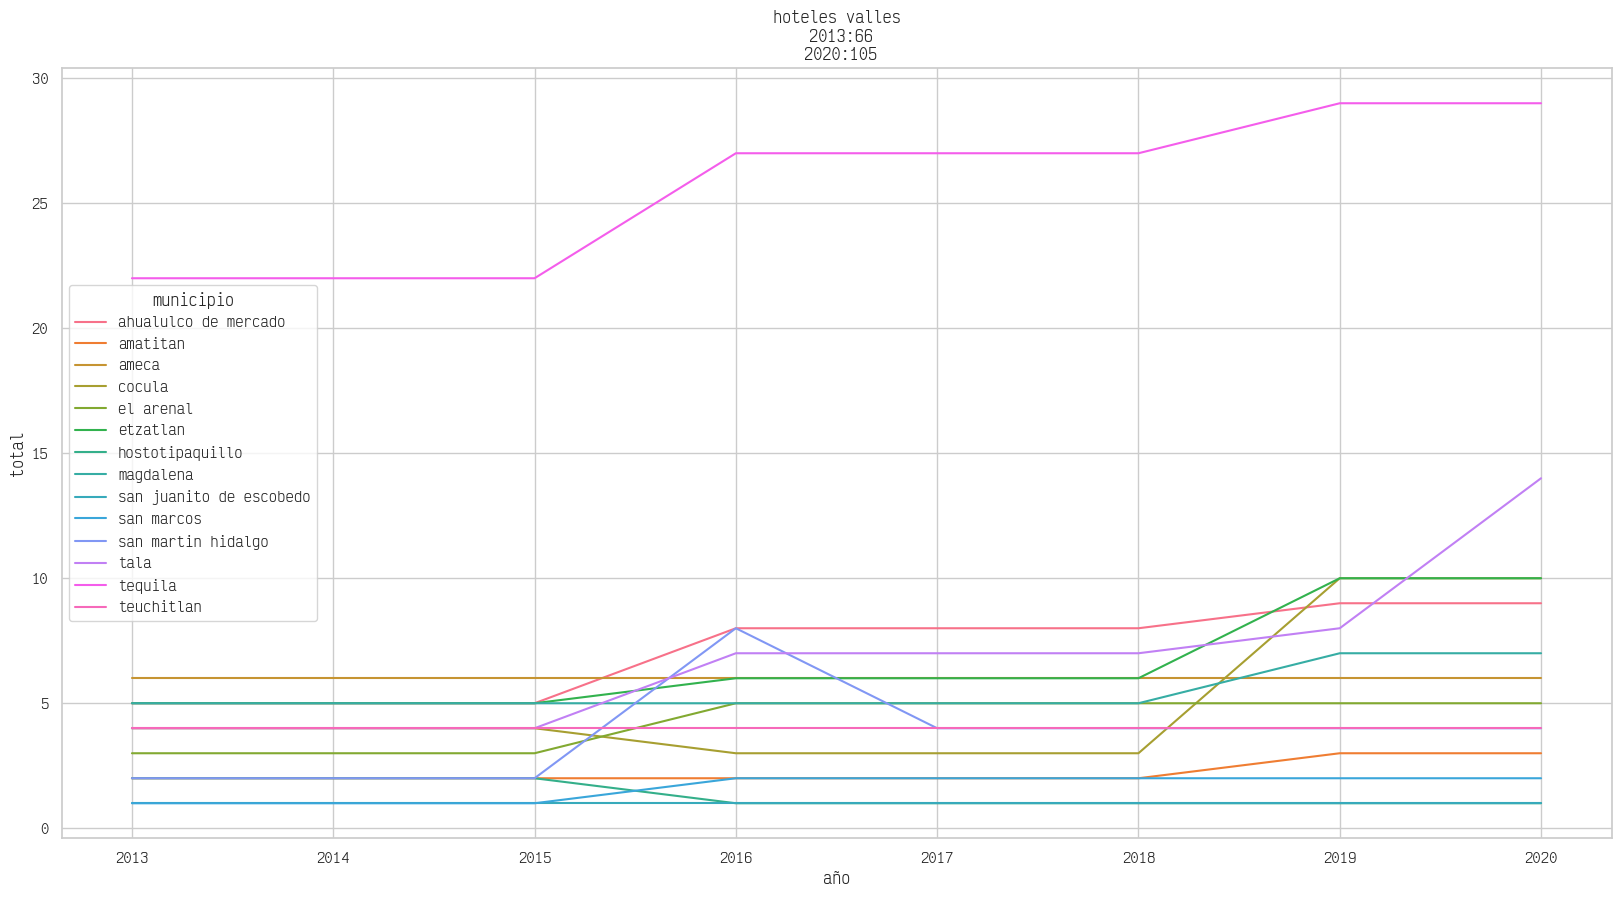

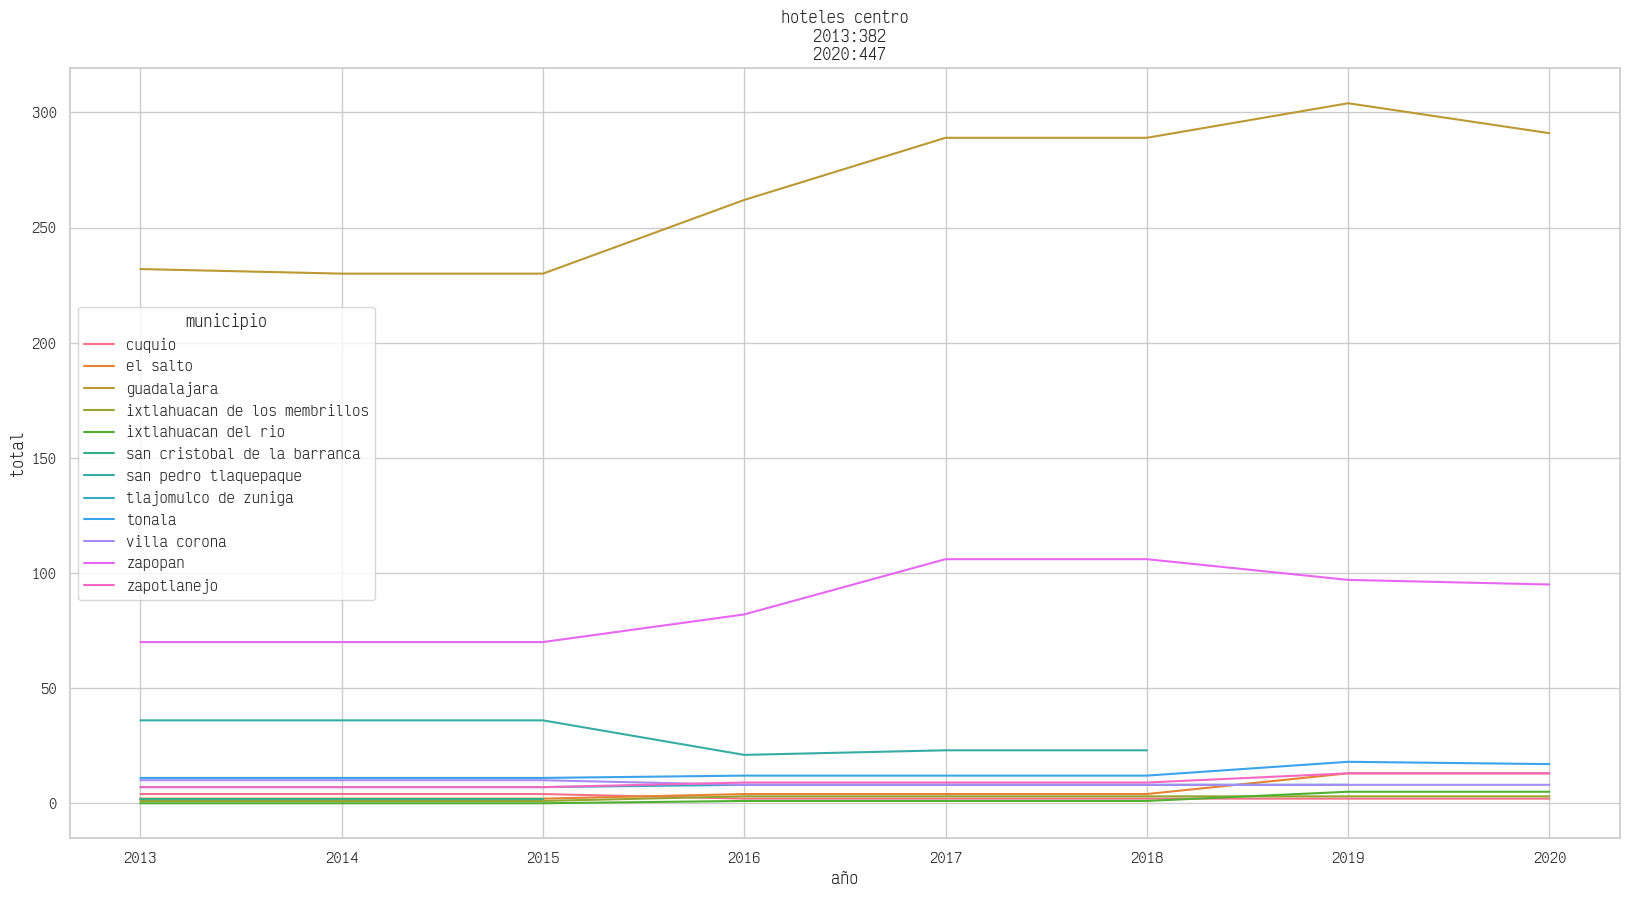

In [24]:

for region in df_hoteles['region'].unique():
    
    df = df_hoteles[df_hoteles['region'] == region]
    total_2013 = df[df['año'] == 2013]['total'].sum()
    total_2020 = df[df['año'] == 2020]['total'].sum()

    fig,ax = plt.subplots(1,1,figsize=(20,10))
    sns.lineplot(df,x='año',y='total',hue='municipio',ax=ax)
    ax.set_title(f'hoteles {region}\n 2013:{total_2013}\n 2020:{total_2020}')

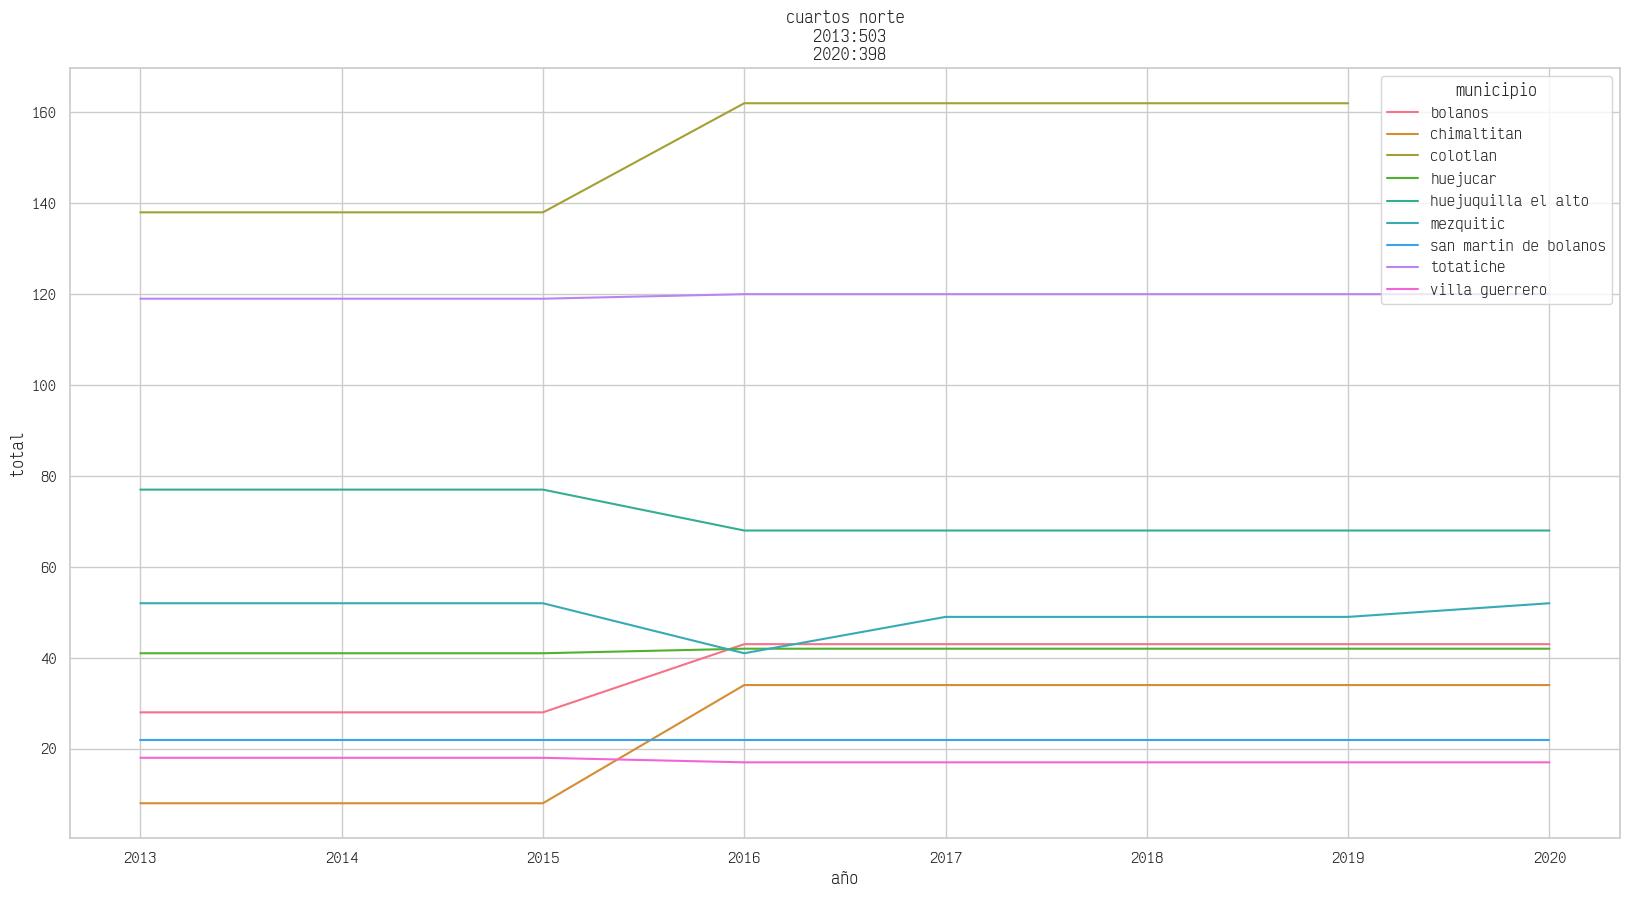

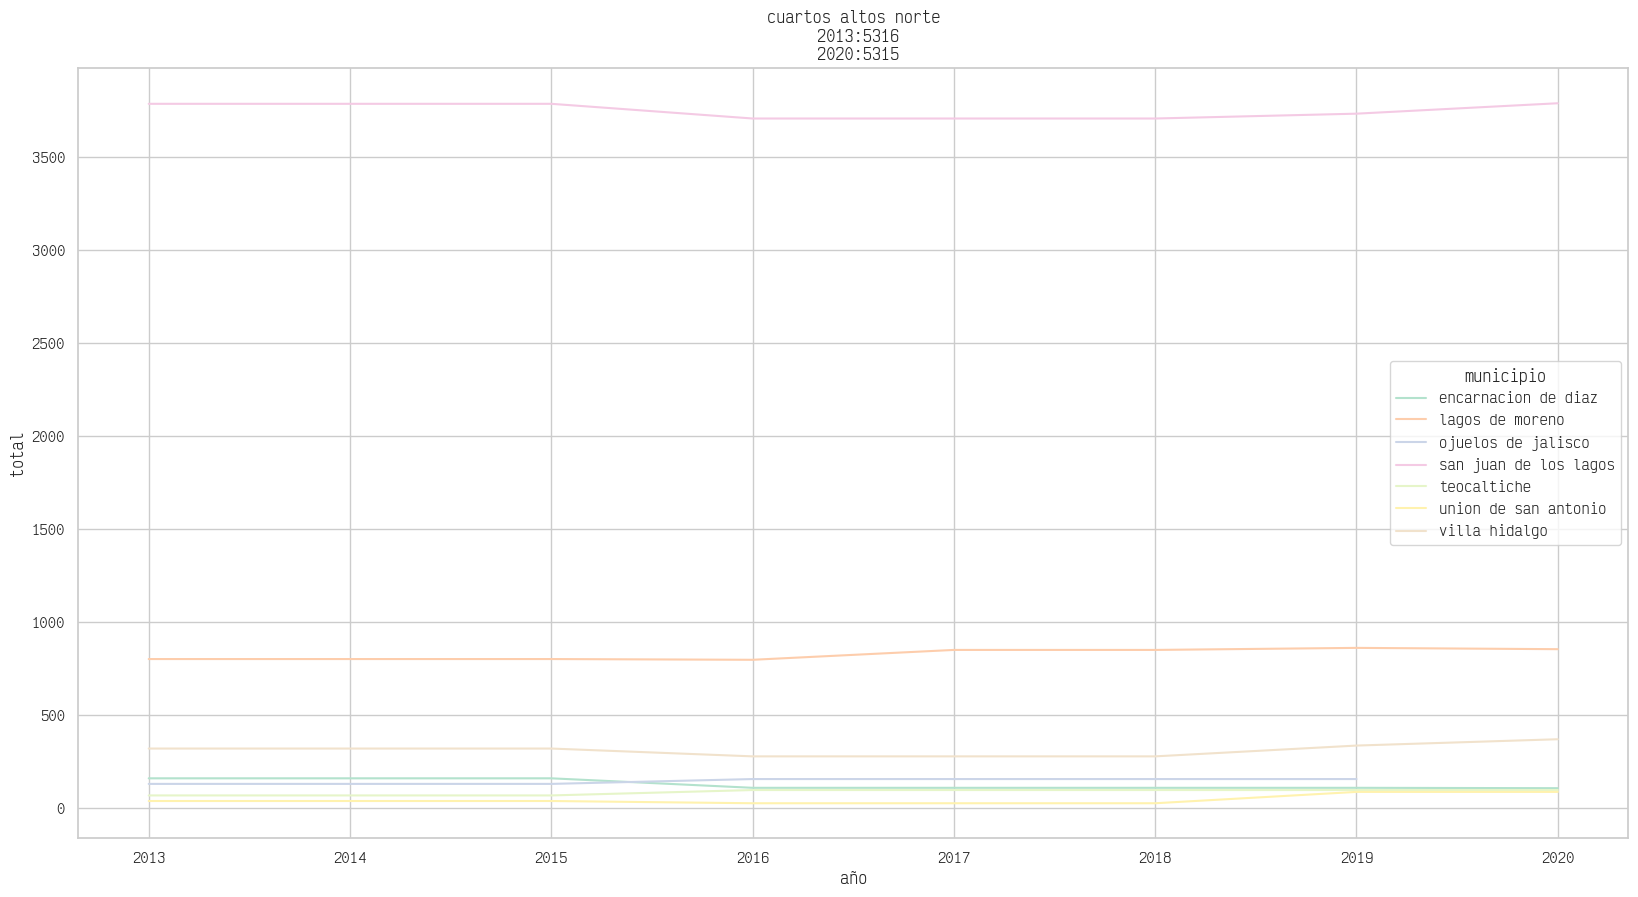

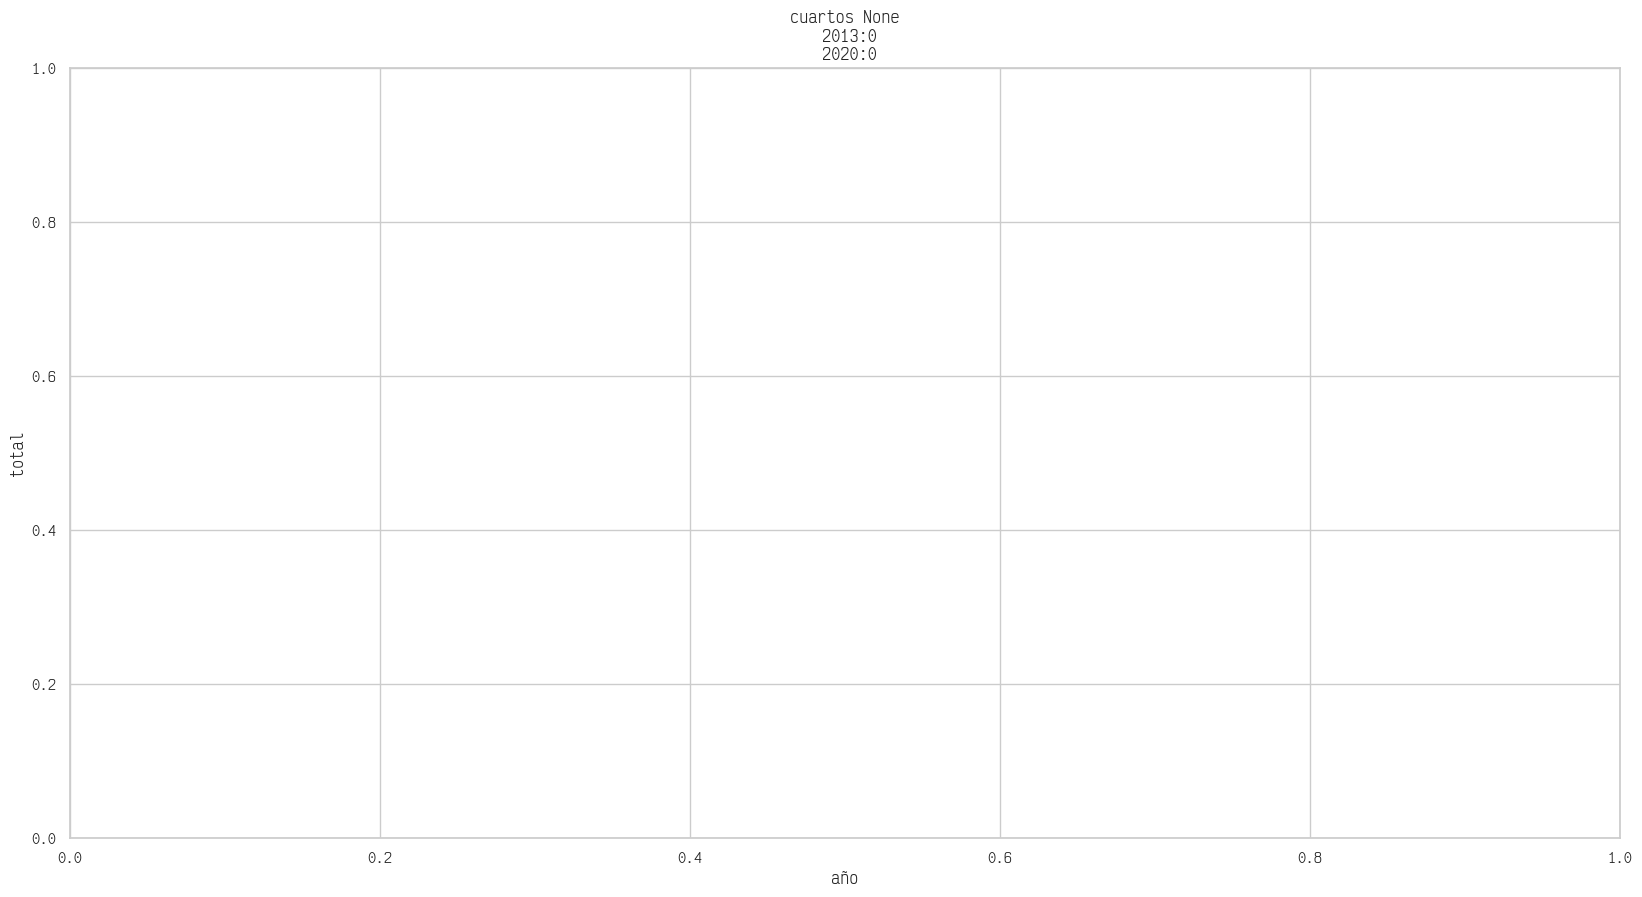

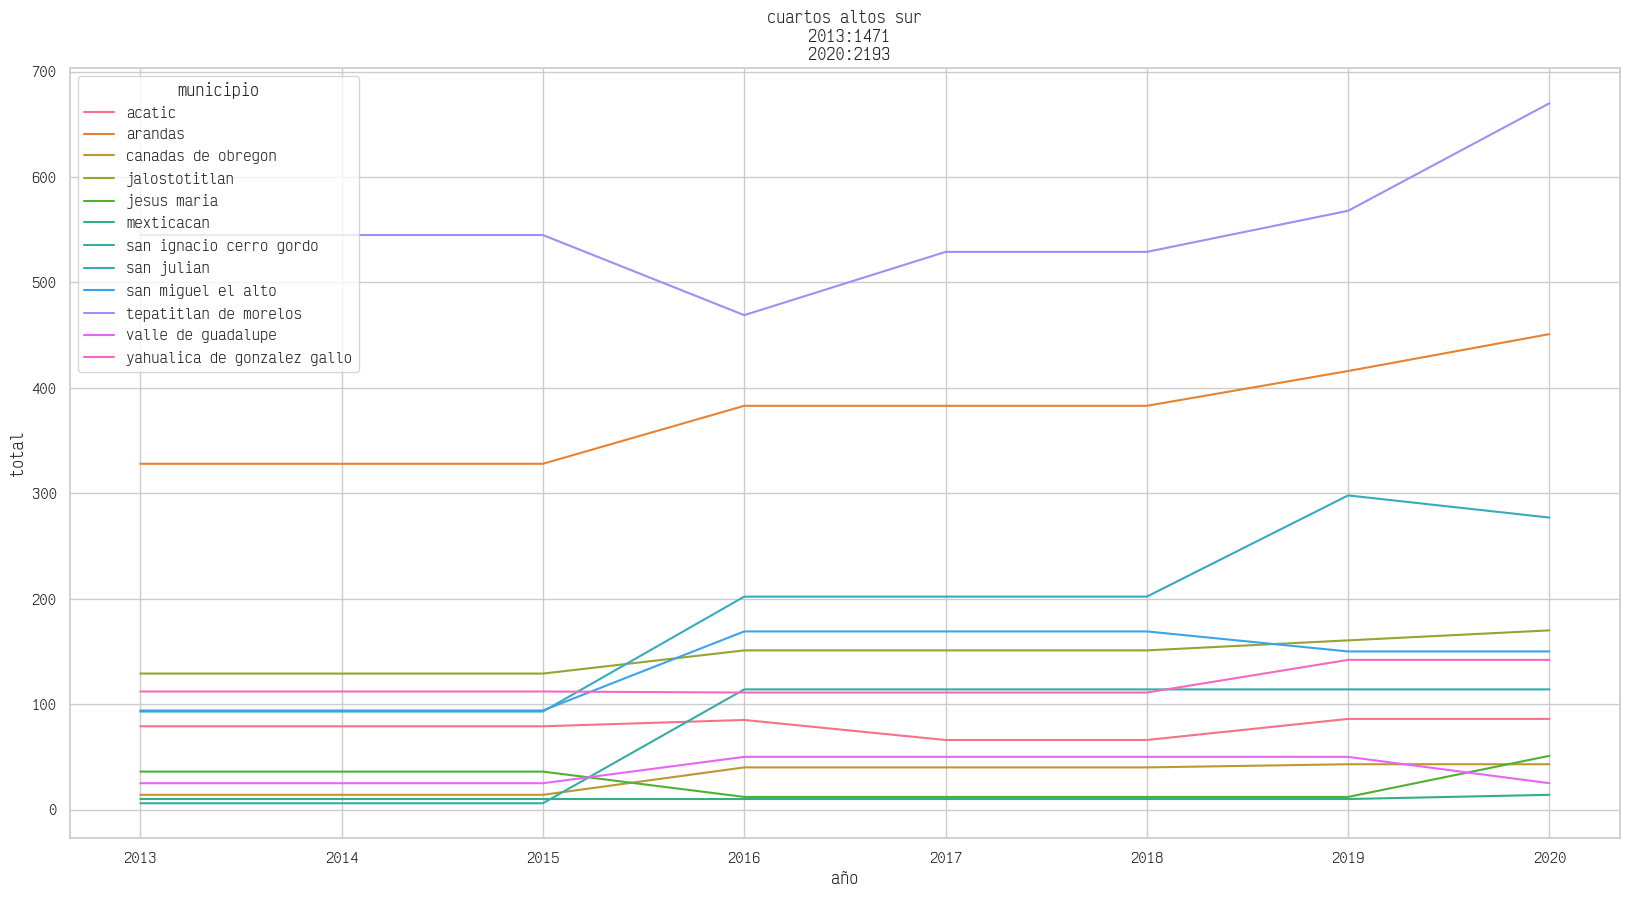

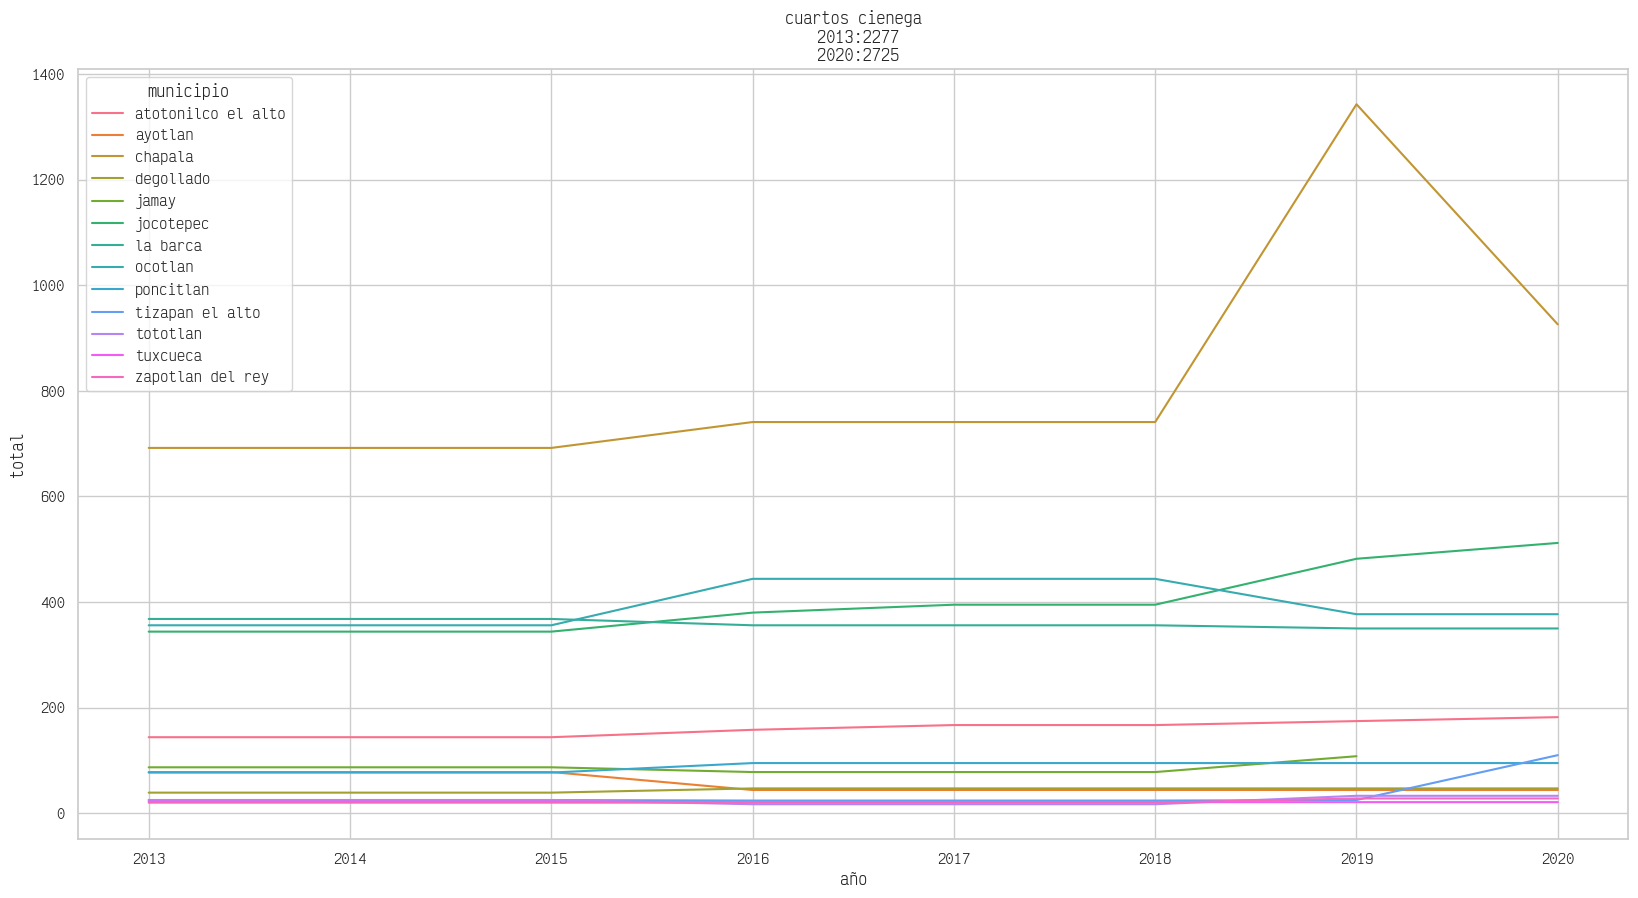

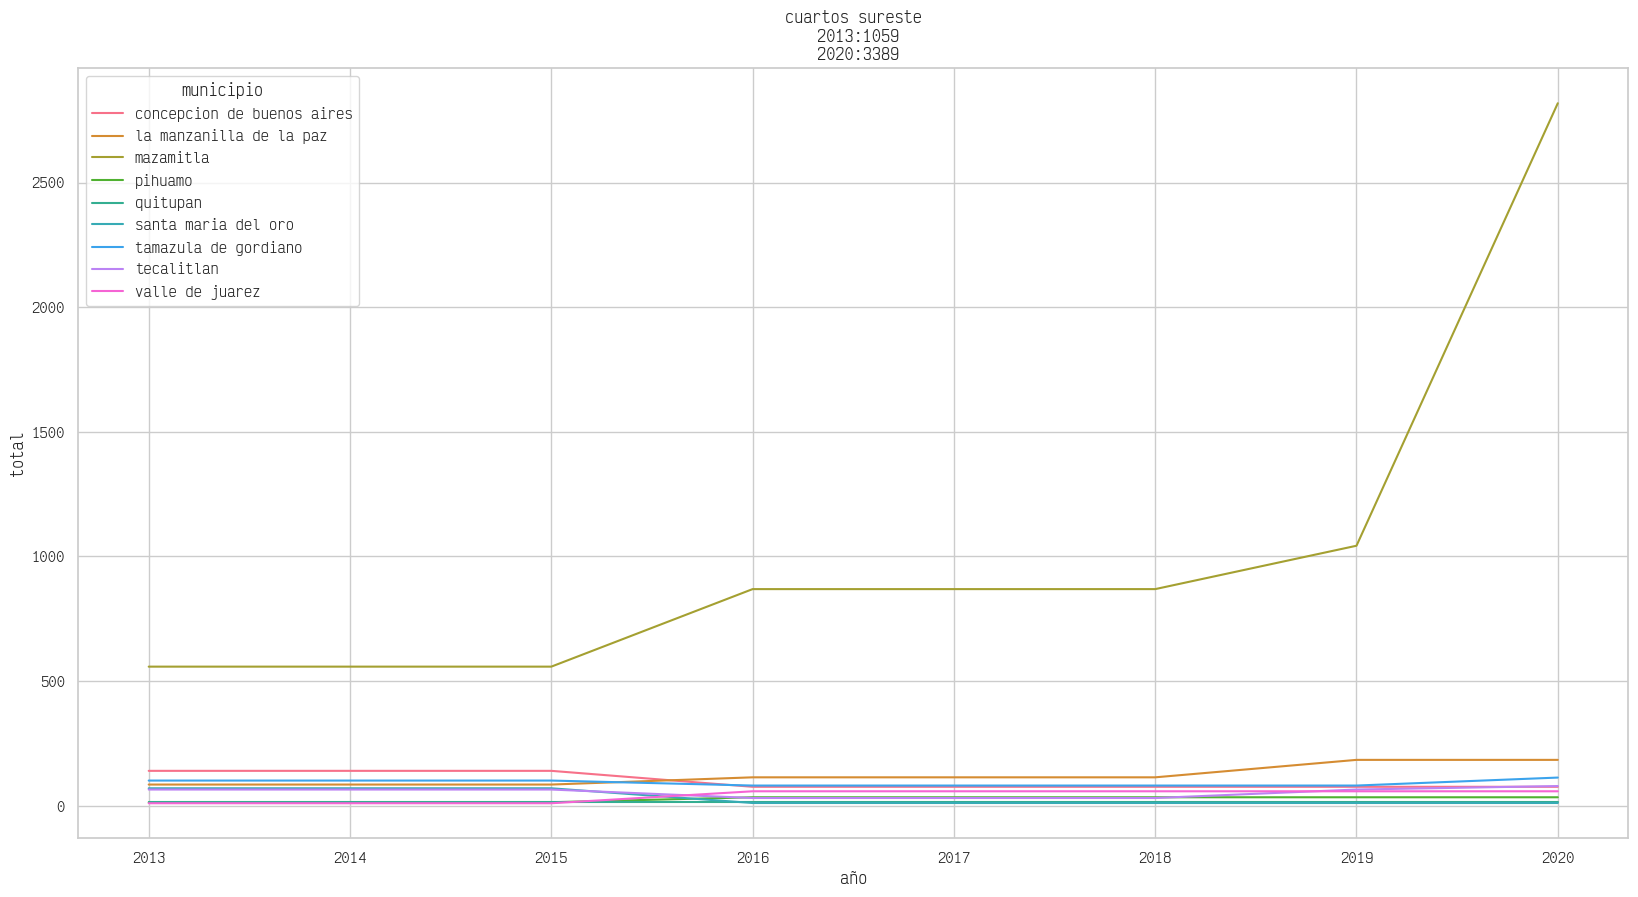

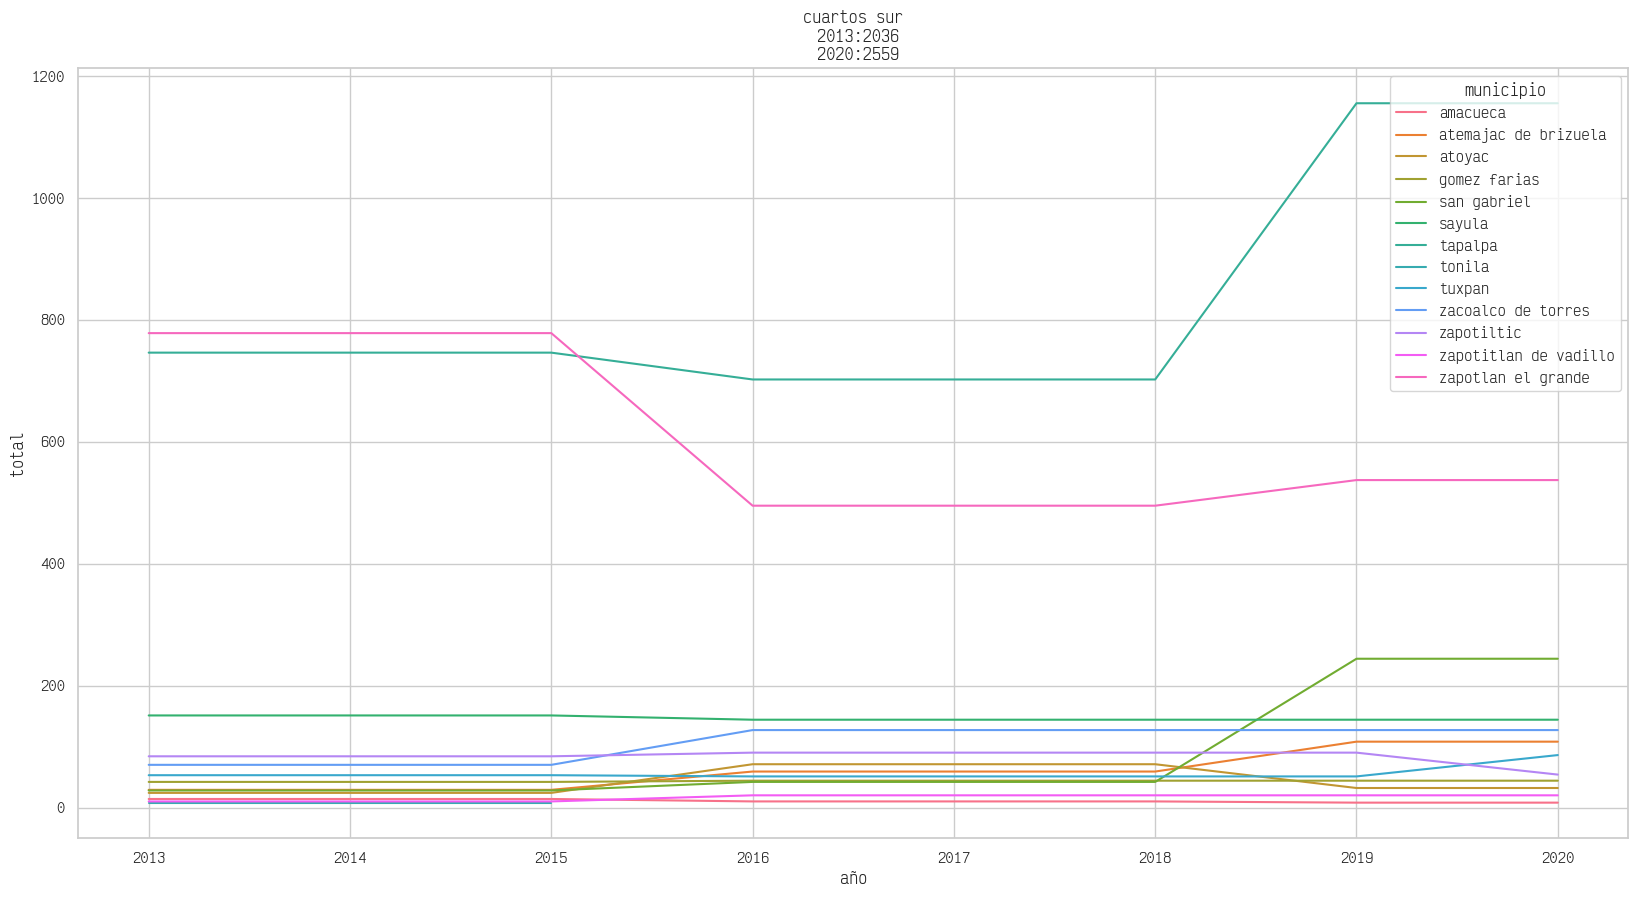

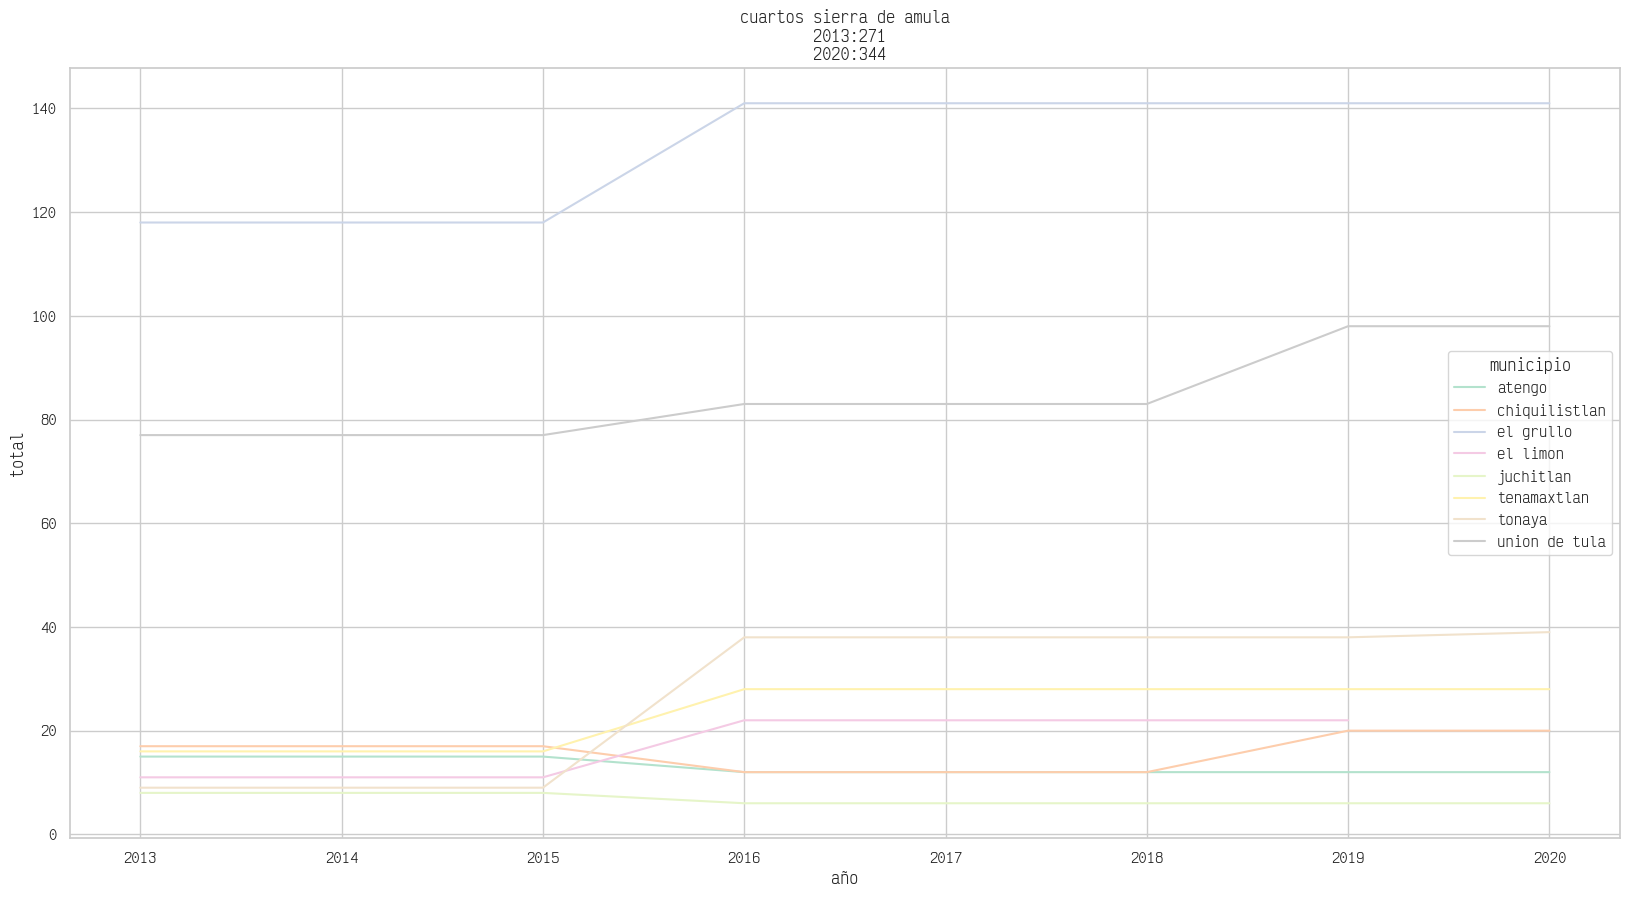

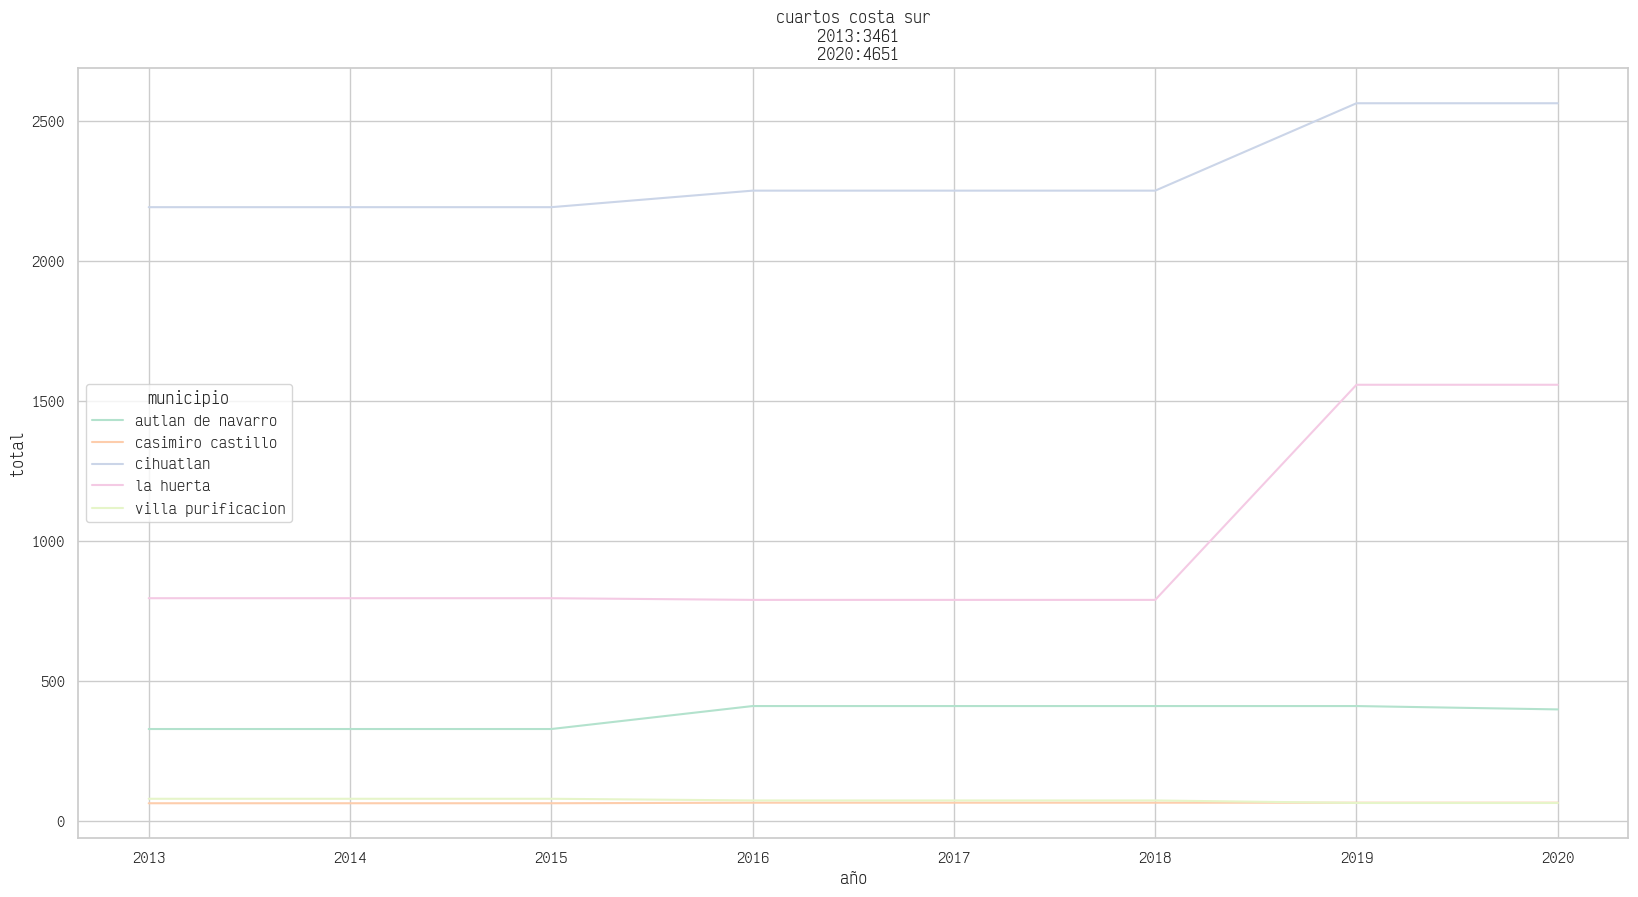

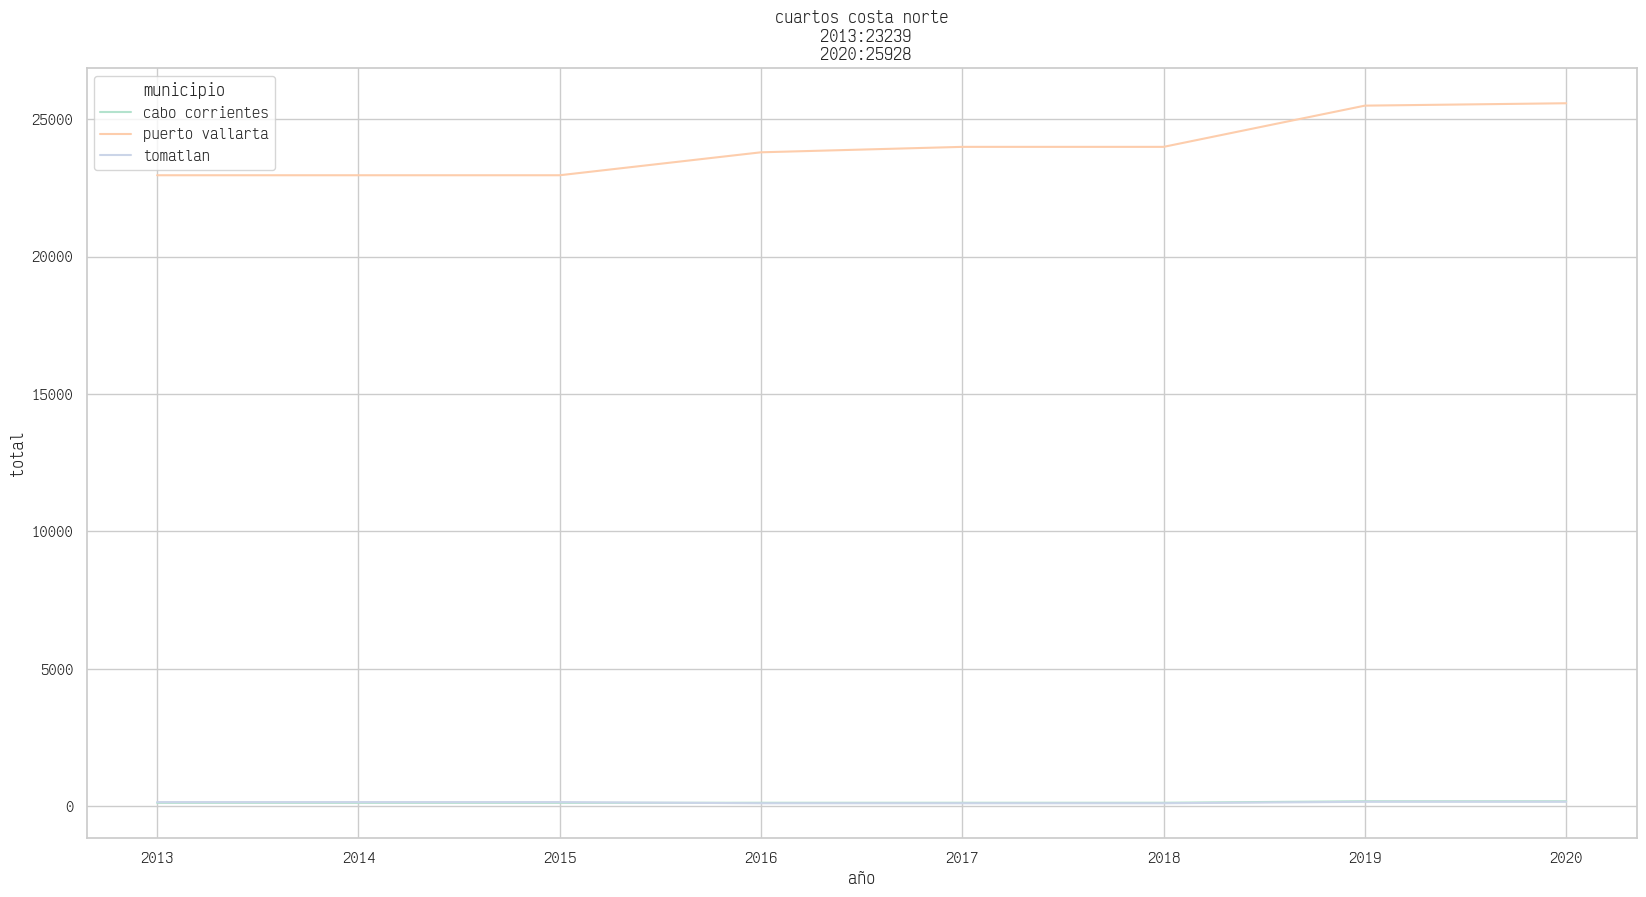

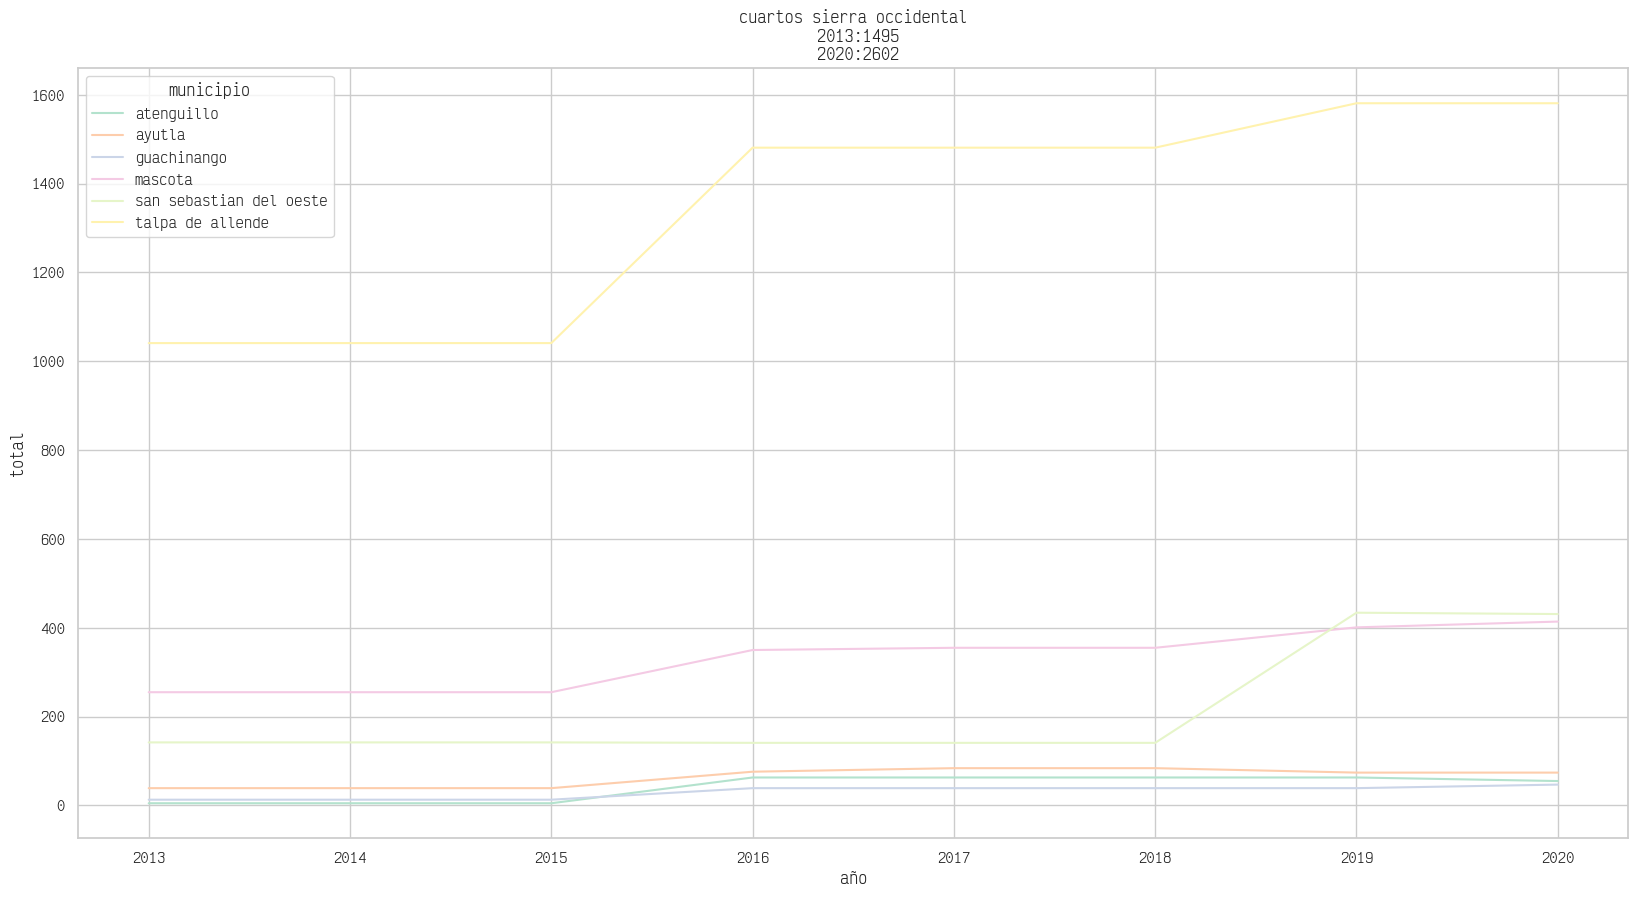

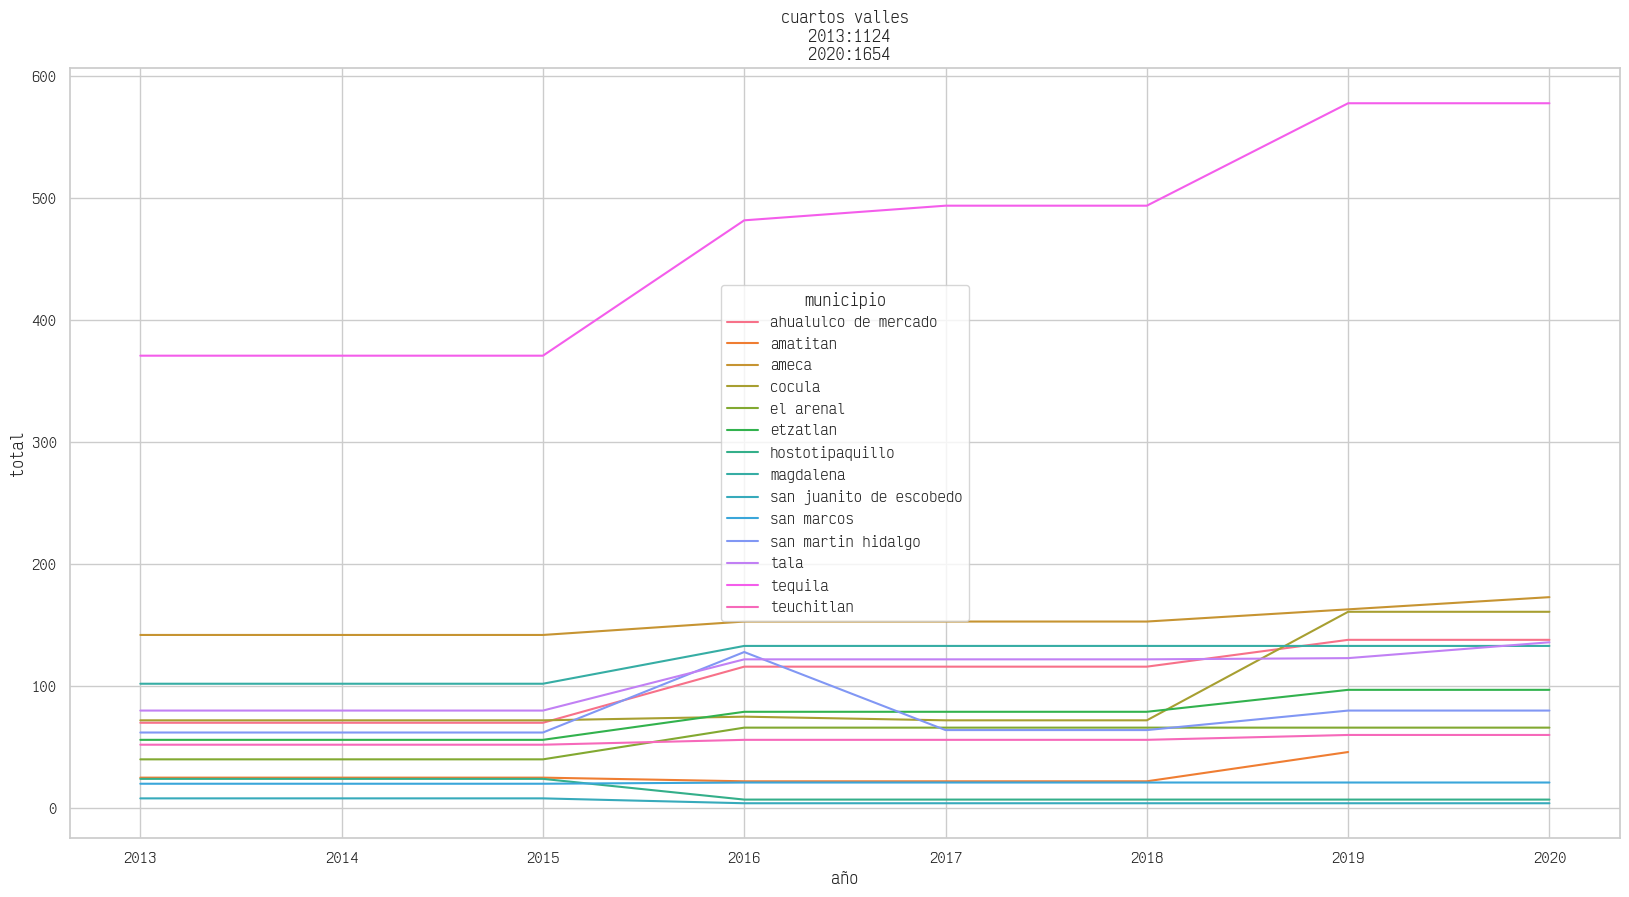

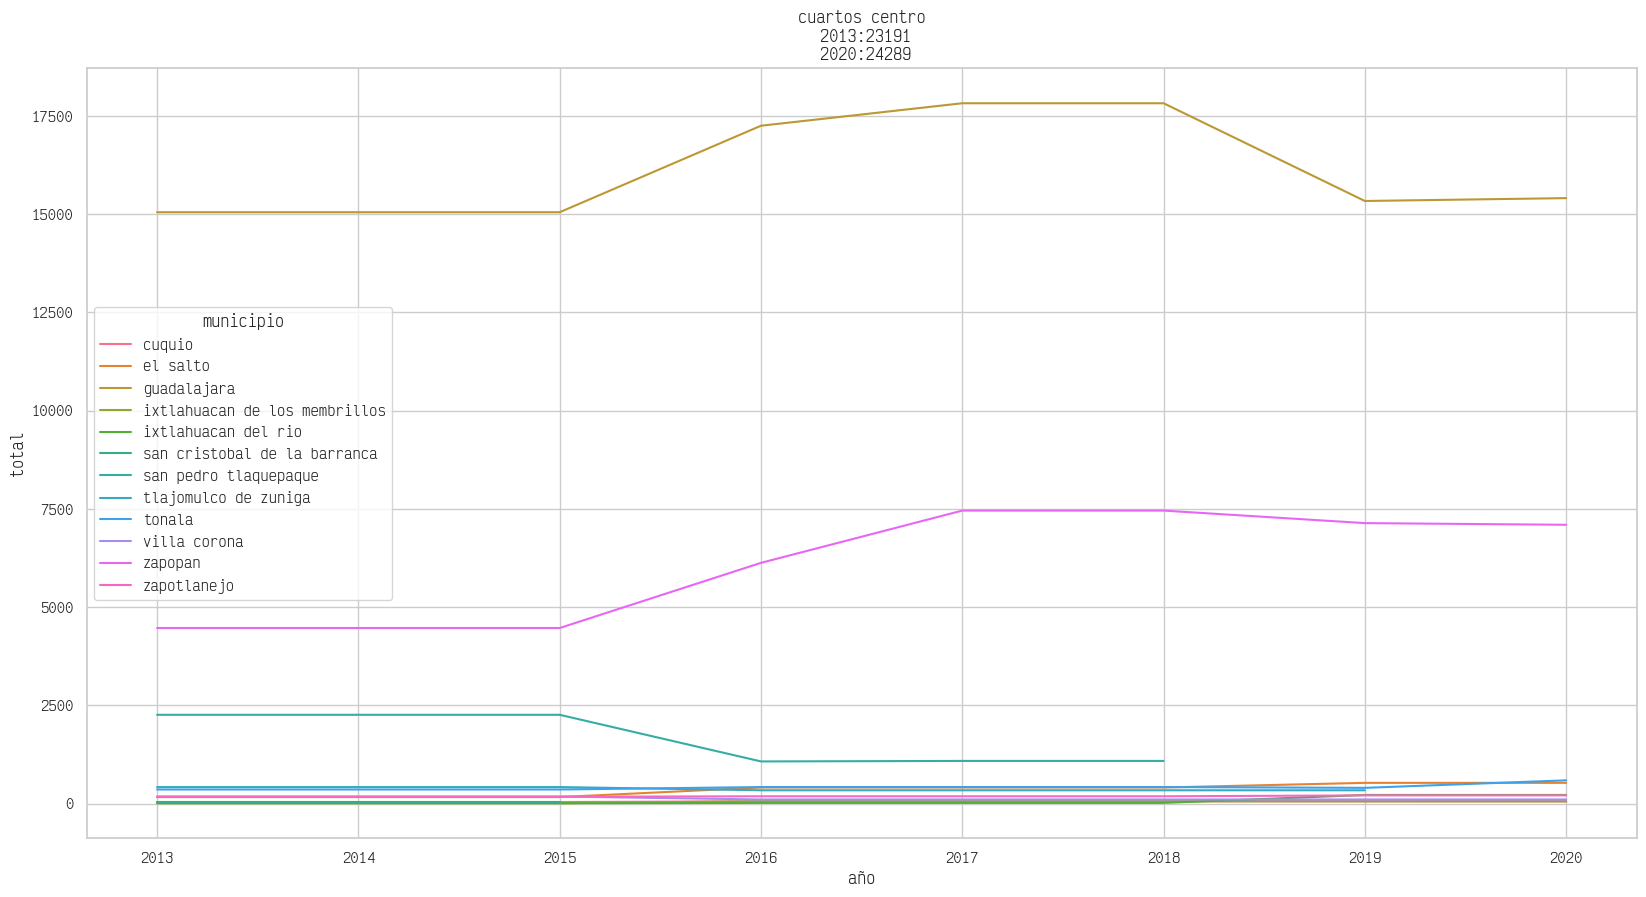

In [25]:
for region in df_cuartos['region'].unique():
    
    df = df_cuartos[df_cuartos['region'] == region]
    total_2013 = df[df['año'] == 2013]['total'].sum()
    total_2020 = df[df['año'] == 2020]['total'].sum()

    fig,ax = plt.subplots(1,1,figsize=(20,10))
    sns.lineplot(df,x='año',y='total',hue='municipio',ax=ax)
    ax.set_title(f'cuartos {region}\n 2013:{total_2013}\n 2020:{total_2020}')

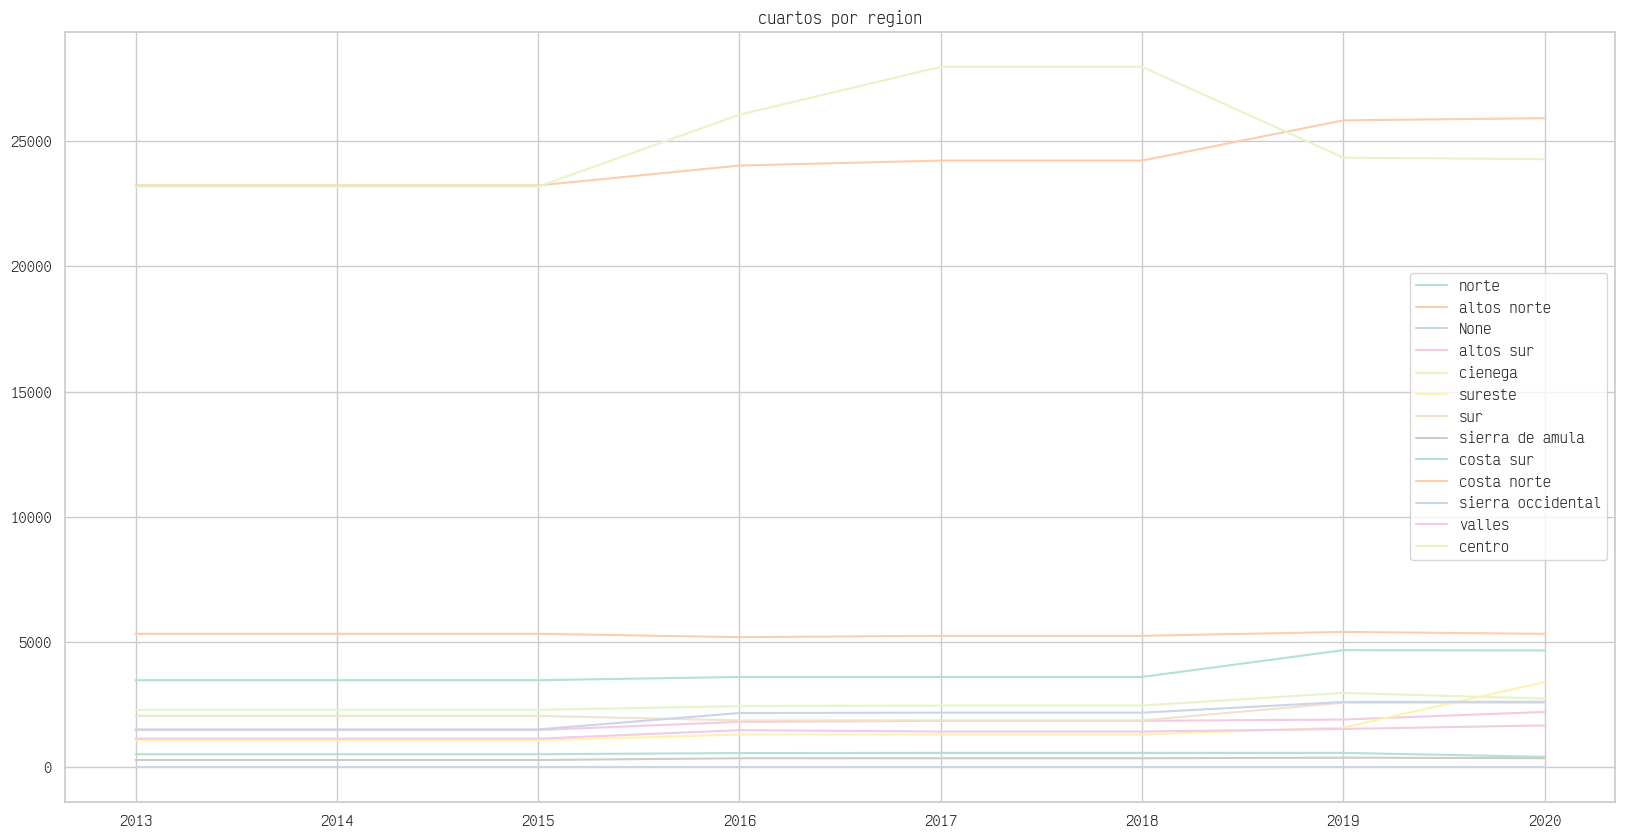

In [26]:
fig,ax = plt.subplots(1,1,figsize=(20,10))
for region in df_cuartos['region'].unique():
    

    df = df_cuartos[df_cuartos['region'] == region]
    totales = [df[df['año'] == year]['total'].sum() for year in range(2013,2021) ]
    

    sns.lineplot(x=[y for y in range(2013,2021)],y=totales,ax=ax,label=f'{region}')
ax.set_title('cuartos por region')
ax.legend()

In [ ]:

df_hoteles_rel = df_hoteles.copy()
df_hoteles_rel = df_hoteles_rel.drop(df_hoteles_rel[(df_hoteles_rel['año'] != 2013) & (df_hoteles_rel['año'] != 2020)].index)


df_hoteles_rel = df_hoteles_rel.groupby('municipio')

In [ ]:
order = ['5 estrella','4 estrella','3 estrella','2 estrella','1 estrella','sin catego']

for mun in df_hoteles_rel:
    # print(mun[1])
    df = mun[1].melt(
    id_vars=['municipio', 'año','region'], 
    value_vars=['5 estrella', '4 estrella', '3 estrella', '2 estrella', '1 estrella', 'sin catego'],
    var_name='estrellas', 
    value_name="cantidad"
    )

    
    
    fig,ax = plt.subplots(1,1)

    sns.barplot(
        data=df,
        x="estrellas",
        y="cantidad",
        hue="año",
        order=order,
        ax=ax
    )
    
    ax.set_title(mun[0])
    plt.xticks(rotation=45)
    plt.tight_layout()

array([[-0.80178373,  0.40824829, -0.20234712],
       [ 0.53452248,  0.81649658, -0.58387515],
       [ 0.26726124,  0.40824829,  0.78622227]])